# I) DESCRIPTION DU PROJET

Ce projet de machine learning consiste à analyser un dataset intitulé **Marketing Campaign** afin de **prédire le comportement de personnes susceptibles d'accepter ou non l'offre d'une campagne marketing**. Ainsi, **construire un modèle de réponse pouvant améliorer considérablement l'efficacité d'une campagne marketing en augmentant les réponses**. 

*ID*

*Year_birth*

*Education*: niveau d'éducation du client

*Marital_Status*: état matrimonial du client

*Income*: revenu annuel du foyer du client

*Kidhome*: nombre de jeunes enfants dans le foyer du client

*Teenhome*: nombre d'adolescents dans le foyer du client

*DtCustomer*: date d'inscription du client auprès de l'entreprise

*Recency*: nombre de jours depuis le dernier achat

*MntWines*: montant dépensé en produits vinicoles au cours des 2 dernières années

*MntFruits*: montant dépensé en produits fruitiers au cours des 2 dernières années

*MntMeatProducts*: montant dépensé en produits carnés au cours des 2 dernières années

*MntFishProducts*: montant dépensé en produits de la pêche au cours des 2 dernières années

*MntSweetProducts*: montant dépensé en produits sucrés au cours des 2 dernières années

*MntGoldProds*: montant dépensé en produits dorés au cours des 2 dernières années

*NumDealsPurchases*: nombre d'achats effectués avec remise

*NumWebPurchases*: nombre d'achats effectués via le site Web de l'entreprise

*NumCatalogPurchases*: nombre d'achats effectués en utilisant le catalogue

*NumStorePurchases*: nombre d'achats effectués directement en magasin

*NumWebVisitsMonth*: nombre de visites sur le site Web de l'entreprise au cours du dernier mois

*AcceptedCmp3*:1 si le client a accepté l'offre lors de la 3ème campagne, 0 sinon

*AcceptedCmp4*:1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon

*AcceptedCmp5*:1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon

*AcceptedCmp1*:1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon

*AcceptedCmp2*:1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon

*Complain*:1 si le client s'est plaint au cours des 2 dernières années

*Z_CostContact*: pourrait représenter le coût pour entrer en contact avec un client

*Z_Revenue*:  pourrait représenter le revenu attribué par client ou par interaction 

*Response (target)*: 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon


# II) DATA PREPROCESSING

In [616]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
!pip install missingno

import missingno as msno

In [617]:
# Load CSV using Pandas
filename = r'C:\Users\Utilisateur\Downloads\marketing_campaign.csv'
df = pd.read_csv(filename,delimiter=';')  # Use header=0 to indicate the first row has column names
# Print the shape of the data
print(df.shape)
df

(2240, 29)


ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  \
0      5524        1957  Graduation         Single 58138.000        0         0  2012-09-04   
1      2174        1954  Graduation         Single 46344.000        1         1  2014-03-08   
2      4141        1965  Graduation       Together 71613.000        0         0  2013-08-21   
3      6182        1984  Graduation       Together 26646.000        1         0  2014-02-10   
4      5324        1981         PhD        Married 58293.000        1         0  2014-01-19   
...     ...         ...         ...            ...       ...      ...       ...         ...   
2235  10870        1967  Graduation        Married 61223.000        0         1  2013-06-13   
2236   4001        1946         PhD       Together 64014.000        2         1  2014-06-10   
2237   7270        1981  Graduation       Divorced 56981.000        0         0  2014-01-25   
2238   8235        1956      Master       Together 69245.000        0         1  2014-01-24   
2239   9405        1954         PhD        Married 52869.000        1         1  2012-10-15   

      Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0          58       635  ...                  7             0             0             0   
1          38        11  ...                  5             0             0             0   
2          26       426  ...                  4             0             0             0   
3          26        11  ...                  6             0             0             0   
4          94       173  ...                  5             0             0             0   
...       ...       ...  ...                ...           ...           ...           ...   
2235       46       709  ...                  5             0             0             0   
2236       56       406  ...                  7             0             0             0   
2237       91       908  ...                  6             0             1             0   
2238        8       428  ...                  3             0             0             0   
2239       40        84  ...                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0                0             0         0              3         11         1  
1                0             0         0              3         11         0  
2                0             0         0              3         11         0  
3                0             0         0              3         11         0  
4                0             0         0              3         11         0  
...            ...           ...       ...            ...        ...       ...  
2235             0             0         0              3         11         0  
2236             1             0         0              3         11         0  
2237             0             0         0              3         11         0  
2238             0             0         0              3         11         0  
2239             0             0         0              3         11         1  

[2240 rows x 29 columns]

In [618]:
# Créer une copie et l'enregistrer
df_copie = df.copy()
df_copie.to_csv(r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv', index=False)

In [619]:
df_copie.describe()

ID  Year_Birth     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count  2240.000    2240.000   2216.000 2240.000  2240.000 2240.000  2240.000   2240.000   
mean   5592.160    1968.806  52247.251    0.444     0.506   49.109   303.936     26.302   
std    3246.662      11.984  25173.077    0.538     0.545   28.962   336.597     39.773   
min       0.000    1893.000   1730.000    0.000     0.000    0.000     0.000      0.000   
25%    2828.250    1959.000  35303.000    0.000     0.000   24.000    23.750      1.000   
50%    5458.500    1970.000  51381.500    0.000     0.000   49.000   173.500      8.000   
75%    8427.750    1977.000  68522.000    1.000     1.000   74.000   504.250     33.000   
max   11191.000    1996.000 666666.000    2.000     2.000   99.000  1493.000    199.000   

       MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count         2240.000         2240.000  ...           2240.000      2240.000      2240.000   
mean           166.950           37.525  ...              5.317         0.073         0.075   
std            225.715           54.629  ...              2.427         0.260         0.263   
min              0.000            0.000  ...              0.000         0.000         0.000   
25%             16.000            3.000  ...              3.000         0.000         0.000   
50%             67.000           12.000  ...              6.000         0.000         0.000   
75%            232.000           50.000  ...              7.000         0.000         0.000   
max           1725.000          259.000  ...             20.000         1.000         1.000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
count      2240.000      2240.000      2240.000  2240.000       2240.000   2240.000  2240.000  
mean          0.073         0.064         0.013     0.009          3.000     11.000     0.149  
std           0.260         0.245         0.115     0.096          0.000      0.000     0.356  
min           0.000         0.000         0.000     0.000          3.000     11.000     0.000  
25%           0.000         0.000         0.000     0.000          3.000     11.000     0.000  
50%           0.000         0.000         0.000     0.000          3.000     11.000     0.000  
75%           0.000         0.000         0.000     0.000          3.000     11.000     0.000  
max           1.000         1.000         1.000     1.000          3.000     11.000     1.000  

[8 rows x 26 columns]

***INTERPRETATION:***
La colonne *Z_CostContact* et *Z_Revenue* ont des valeurs constantes, 3 et 11 respectivement(pour chaque colonne, le min et le max sont égaux). 

Cela implique que ces colonnes n'apporteront auccune aide dans notre modèle de prédiction.

# Data cleaning

In [620]:
df_copie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [621]:
#checking whether it has null values(missing data) or not
df_copie.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

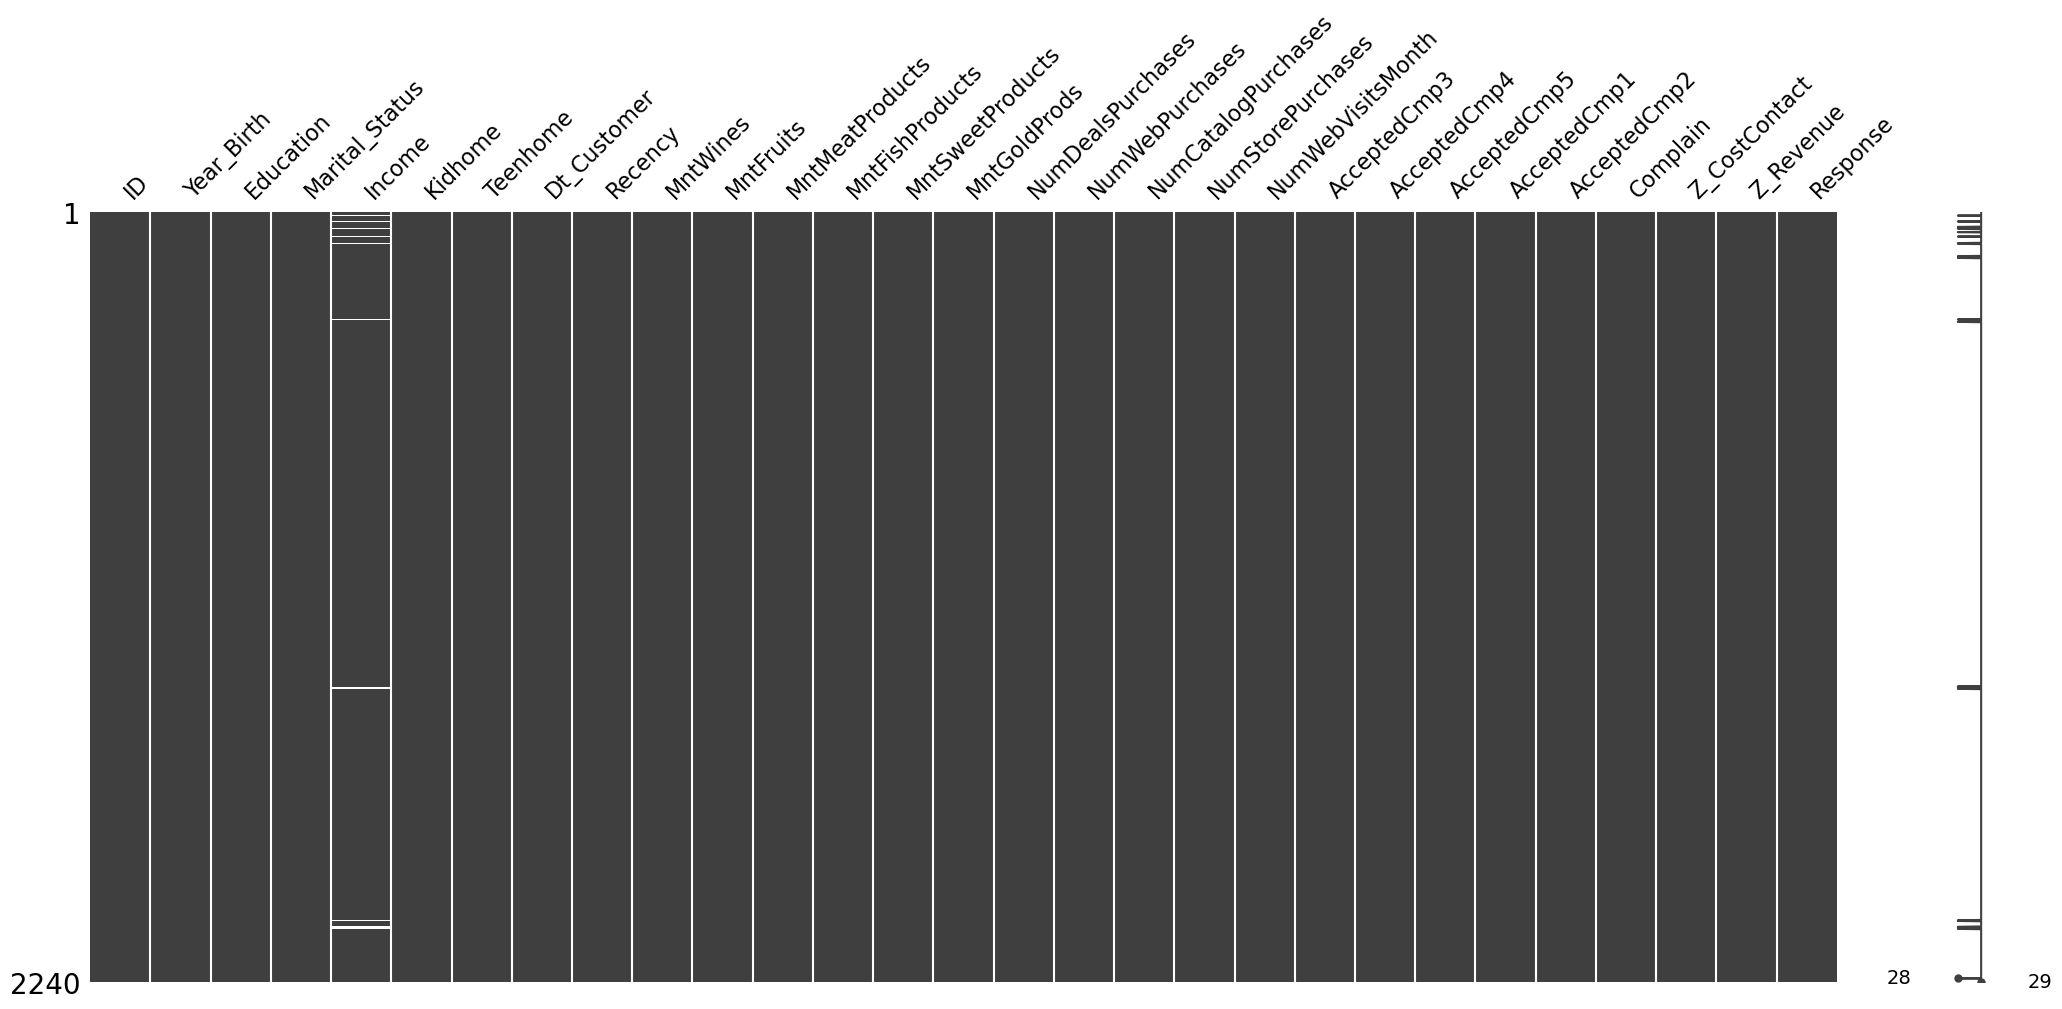

In [622]:
msno.matrix(df_copie)

Nous avons 24 missing values dans la colonne *Income* qui sont probablement dû à un cas de Missing at Random (MAR):  L’absence de données est liée à d’autres variables comme *Education*, *Marital_Status* ou peut-être encore *Dt_Customer*.

<Axes: >

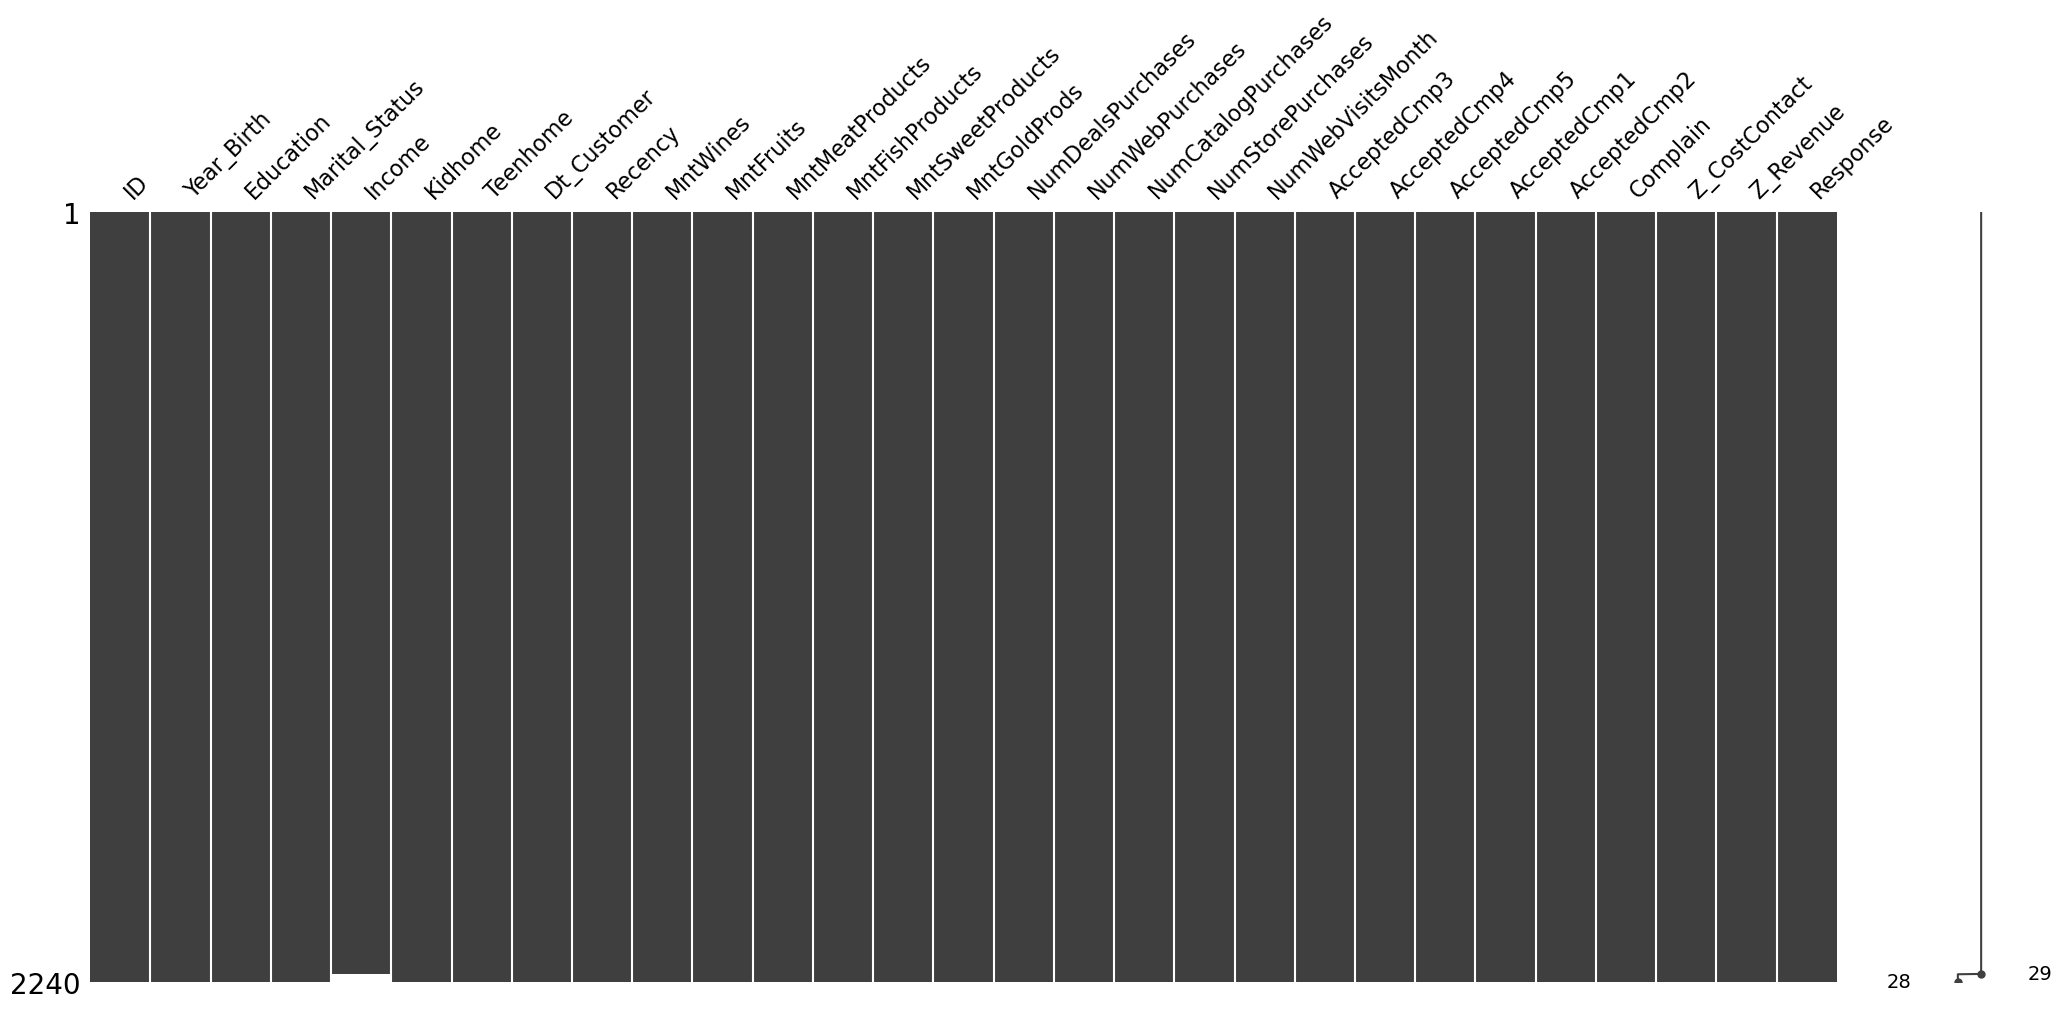

In [623]:
sorted = df_copie.sort_values('Income')
msno.matrix(sorted)

**Traitement des missing data**: 
Cette méthode est adaptée pour la résolution de notre problème.

In [624]:
filename =r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv'
df_copie = pd.read_csv(filename)
def impute_income_with_mean(df_copie):
    if 'Income' in df_copie.columns:
        # Vérification des valeurs manquantes avant l'imputation
        missing_before = df_copie['Income'].isnull().sum()
        print(f"Valeurs manquantes dans 'Income' avant l'imputation : {missing_before}")
        
        # Calcul et remplacement par la moyenne
        mean_income = df_copie['Income'].mean()
        print(f"Moyenne de 'Income' : {mean_income}")
        df_copie['Income'] = df_copie['Income'].fillna(mean_income)
        
        # Vérification des valeurs manquantes après l'imputation
        missing_after = df_copie['Income'].isnull().sum()
        print(f"Valeurs manquantes dans 'Income' après l'imputation : {missing_after}")
    else:
        print("La colonne 'Income' n'existe pas dans le DataFrame.")
    return df_copie

# Appliquer l'imputation sur la colonne Income
df_copie = impute_income_with_mean(df_copie)

# Afficher un aperçu des valeurs manquantes avant et après
print("Aperçu des valeurs manquantes après imputation :")
print(df_copie['Income'].isnull().sum())

# Sauvegarder les modifications dans le même fichier
df_copie.to_csv(r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv', index=False)
print("Modifications sauvegardées dans le fichier original.")


Valeurs manquantes dans 'Income' avant l'imputation : 24
Moyenne de 'Income' : 52247.25135379061
Valeurs manquantes dans 'Income' après l'imputation : 0
Aperçu des valeurs manquantes après imputation :
0
Modifications sauvegardées dans le fichier original.


In [625]:
df_copie.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

La colonne ID n'apporte aucune information, en lien avec les autres colonnes. Supprimons-là, ainsi que les colonnes Z_CostContact et Z_Revenue. 

In [626]:
filename =r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv'
df_copie = pd.read_csv(filename)
# Supprimer la colonne 'ID', 'Z_CostContact' et 'Z_Revenue'
df_copie = df_copie.drop('ID', axis=1)
df_copie = df_copie.drop('Z_CostContact', axis=1)
df_copie = df_copie.drop('Z_Revenue', axis=1)

# Afficher le DataFrame modifié pour vérification
df_copie.to_csv(r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv', index=False)
print(df_copie.shape)

(2240, 26)


# Data Analysis

In [627]:
df_copie['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [628]:
filename =r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv'
df_copie = pd.read_csv(filename)
# Assurez-vous que Dt_Customer est bien au format datetime
df_copie['Dt_Customer'] = pd.to_datetime(df_copie['Dt_Customer'])

# Extraire l'année, le mois et le jour
df_copie['Customer Year'] = df_copie['Dt_Customer'].dt.year
df_copie['Customer Month'] = df_copie['Dt_Customer'].dt.month
df_copie['Customer Day'] = df_copie['Dt_Customer'].dt.day

# Afficher le résultat
print(df_copie[['Customer Year', 'Customer Month', 'Customer Day']].head())

# Enregistrer les modifications dans le fichier CSV
df_copie.to_csv(r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv', index=False)

   Customer Year  Customer Month  Customer Day
0           2012               9             4
1           2014               3             8
2           2013               8            21
3           2014               2            10
4           2014               1            19


In [629]:
print(df_copie.dtypes)

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                        int64
Customer Yea

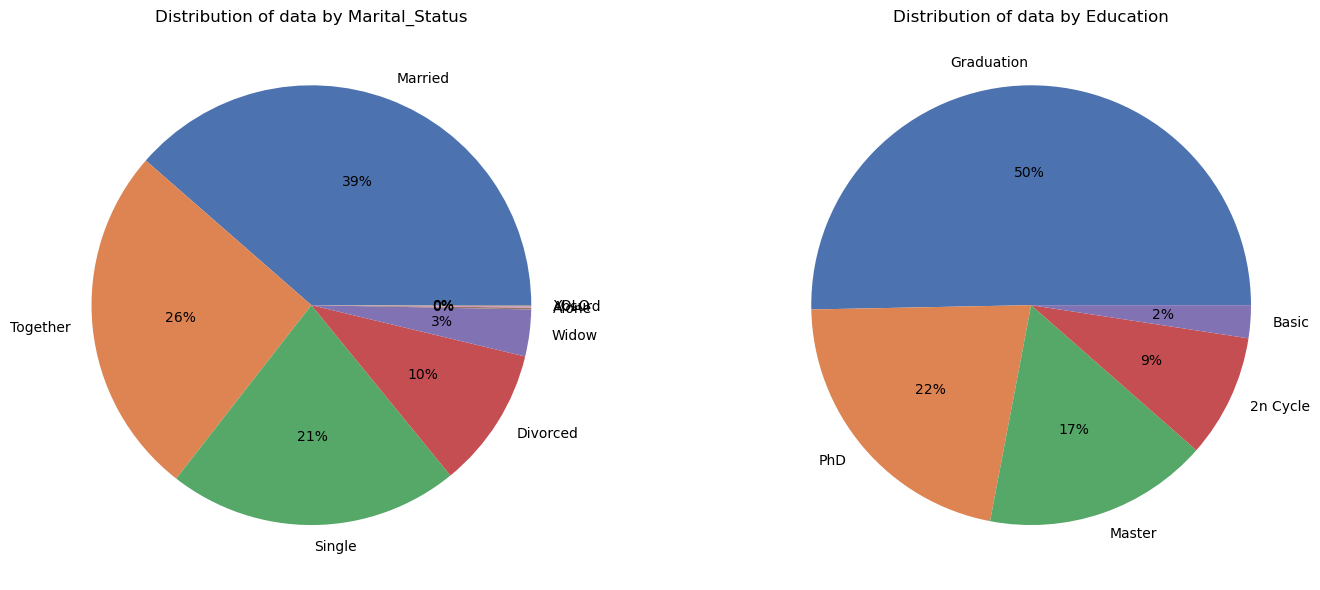

In [630]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # Création de deux sous-graphiques

# Distribution for column marital_status
df_copie1 = df_copie['Marital_Status'].value_counts()
labels1 = df_copie1.index

# Seaborn color palette
colors = sns.color_palette('deep')

#create pie chart for marital_status
ax1.pie(df_copie1, labels=labels1, colors=colors, autopct='%.0f%%')
ax1.set_title('Distribution of data by Marital_Status')

# Distribution for column Education
df_copie2 = df_copie['Education'].value_counts()
labels2 = df_copie2.index

#create pie chart for Education
ax2.pie(df_copie2, labels=labels2, colors=colors, autopct='%.0f%%')
ax2.set_title('Distribution of data by Education')

# Afficher les graphiques
plt.tight_layout()
plt.show()

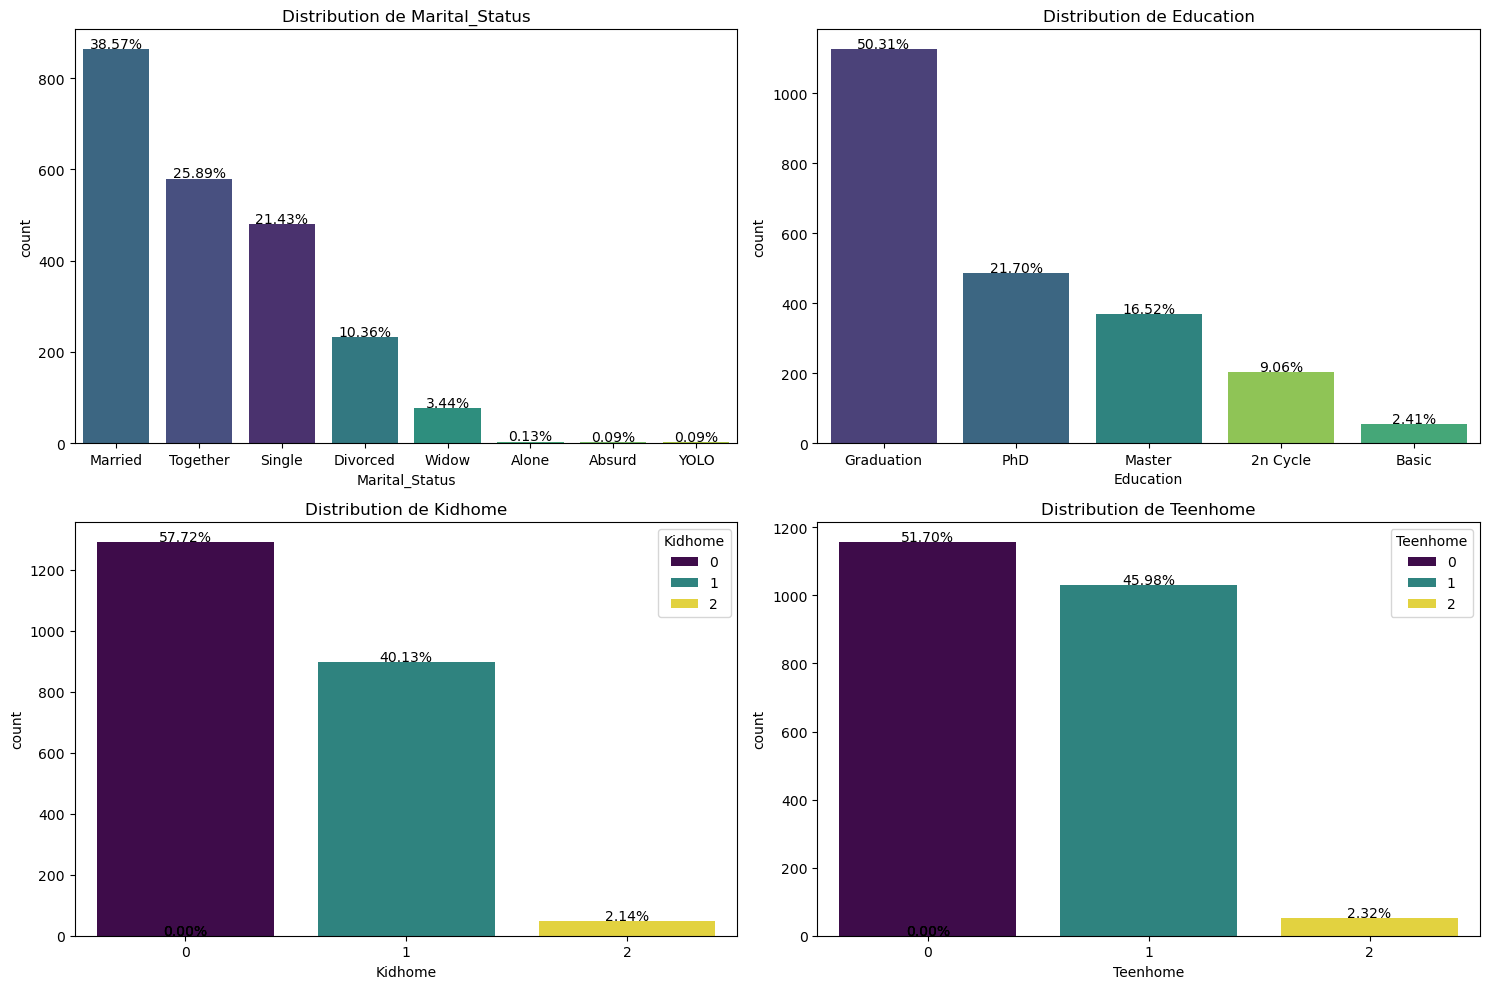

In [631]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Création de 4 sous-graphiques

# colonnes à visualiser
columns=['Marital_Status', 'Education', 'Kidhome', 'Teenhome']
for i, col in enumerate(columns):
    ax= axes[i//2, i%2]
    total = float(len(df_copie[col]))
    ordre_categories = df_copie[col].value_counts().index.tolist()
    sns.countplot(x=col, data=df_copie, hue=col, order=ordre_categories, palette="viridis", ax=ax)
    ax.set_title(f'Distribution de {col}')
    
    # Add percentages
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100 * height/total),
                ha="center")

plt.tight_layout()
plt.show()

**Interprétation:**

**38.6%** des clients sont **marriés**, contre **25.9%** qui sont **célibataires**. Les catégories **Alone**, **Absurd** et **YOLO** sont les moins fréquents. Aussi **50.3%** sont **diplomés**, contre **21.7%** qui ont un **doctorat**, suivi de ceux ayant un **master**:**16.5%**. De même, **57.72%** des clients n'ont *pas d'enfants** contre **40.13%** qui ont **1 enfant** et seulement **2.14%** ont **2 enfants**. Même chose pour les clients avec adolescents: la majorité(**51.70%**) n'en ont pas . Ainsi, **cette clientèle est principalement constituée de personnes diplômés, marriés, à majorité sans enfants et adolescents**. Ces pourcentages influent sur les catégories de clients qui acceptent ou non les campagnes marketing et permet donc de cibler une popuation particulière.

In [632]:
filename =r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv'
df_copie = pd.read_csv(filename)
column_values = df_copie.iloc[:, 0]  # Les indices commencent à 0
value_min = min(column_values)
value_max = max(column_values)
print(f'La valeur minimale dans la 1ème colonne est: {value_min}')
print(f'La valeur maximale dans la 1ème colonne est: {value_max}')

La valeur minimale dans la 1ème colonne est: 1893
La valeur maximale dans la 1ème colonne est: 1996


In [633]:
# Afficher les valeurs uniques de la colonne 'YearBirth'
unique_values = df_copie['Year_Birth'].unique()
print("Valeurs uniques de Year_Birth :", unique_values)

Valeurs uniques de Year_Birth : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]


**Observations**:
Il y'a apparition d'une seule valeur (1893) qui n'est pas conforme avec l'ensemble des données.

In [634]:
filename =r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv'
df_copie = pd.read_csv(filename)
# Identifier l'index de la ligne à supprimer
index_to_remove = df_copie[df_copie['Year_Birth'] == 1893].index

# Supprimer la ligne
df_copie = df_copie.drop(index_to_remove)
df_copie.to_csv(r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv', index=False)

La ligne Year-Birth = 1893 est la seule ligne dont la valeur n'est pas conforme avec les autres lignes. Elle est donc un outlier qui pourrait provenir d'une saisie incorrecte. Pour ne pas fausser les résultats des modèles, supprimer cette ligne est préférable. Aussi, cette suppresion n'aura pas un impact négatif sur le modèle, vu le nombre total de lignes du data.

In [635]:
print(df_copie.shape)

(2239, 29)


In [636]:
import datetime
# Calculate "Age"
current_year = 2024
df_copie['Age'] = current_year - df_copie['Year_Birth']
print("L'âge moyen est :", df_copie['Age'].mean())
print("L'âge minimum est :", df_copie['Age'].min())
print("L'âge maximum est :", df_copie['Age'].max())

L'âge moyen est : 55.16033943724877
L'âge minimum est : 28
L'âge maximum est : 125


In [637]:
print(df_copie.shape)
df_copie

(2239, 30)


Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  Recency  \
0           1957  Graduation         Single 58138.000        0         0  2012-09-04       58   
1           1954  Graduation         Single 46344.000        1         1  2014-03-08       38   
2           1965  Graduation       Together 71613.000        0         0  2013-08-21       26   
3           1984  Graduation       Together 26646.000        1         0  2014-02-10       26   
4           1981         PhD        Married 58293.000        1         0  2014-01-19       94   
...          ...         ...            ...       ...      ...       ...         ...      ...   
2235        1967  Graduation        Married 61223.000        0         1  2013-06-13       46   
2236        1946         PhD       Together 64014.000        2         1  2014-06-10       56   
2237        1981  Graduation       Divorced 56981.000        0         0  2014-01-25       91   
2238        1956      Master       Together 69245.000        0         1  2014-01-24        8   
2239        1954         PhD        Married 52869.000        1         1  2012-10-15       40   

      MntWines  MntFruits  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0          635         88  ...             0             0             0             0         0   
1           11          1  ...             0             0             0             0         0   
2          426         49  ...             0             0             0             0         0   
3           11          4  ...             0             0             0             0         0   
4          173         43  ...             0             0             0             0         0   
...        ...        ...  ...           ...           ...           ...           ...       ...   
2235       709         43  ...             0             0             0             0         0   
2236       406          0  ...             0             0             1             0         0   
2237       908         48  ...             1             0             0             0         0   
2238       428         30  ...             0             0             0             0         0   
2239        84          3  ...             0             0             0             0         0   

      Response  Customer Year  Customer Month  Customer Day  Age  
0            1           2012               9             4   67  
1            0           2014               3             8   70  
2            0           2013               8            21   59  
3            0           2014               2            10   40  
4            0           2014               1            19   43  
...        ...            ...             ...           ...  ...  
2235         0           2013               6            13   57  
2236         0           2014               6            10   78  
2237         0           2014               1            25   43  
2238         0           2014               1            24   68  
2239         1           2012              10            15   70  

[2239 rows x 30 columns]

In [638]:
print(df_copie['Age'].describe())

count   2239.000
mean      55.160
std       11.879
min       28.000
25%       47.000
50%       54.000
75%       65.000
max      125.000
Name: Age, dtype: float64


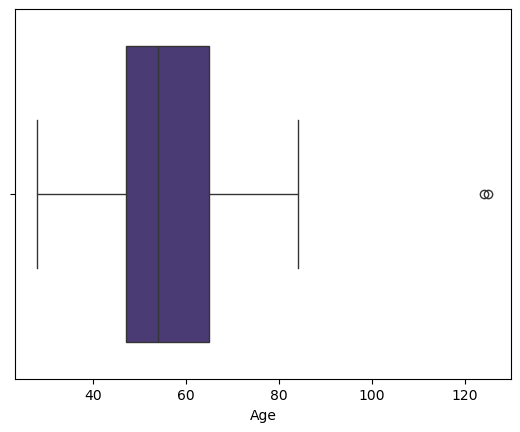

     Year_Birth Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  Recency  \
192        1900  2n Cycle       Divorced 36640.000        1         0  2013-09-26       99   
339        1899       PhD       Together 83532.000        0         0  2013-09-26       36   

     MntWines  MntFruits  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
192        15          6  ...             0             0             0             0         1   
339       755        144  ...             0             1             0             0         0   

     Response  Customer Year  Customer Month  Customer Day  Age  
192         0           2013               9            26  124  
339         0           2013               9            26  125  

[2 rows x 30 columns]


In [639]:
sns.boxplot(x=df_copie['Age'])
plt.show()

# Calculer les quartiles et les valeurs extrêmes
Q1 = df_copie['Age'].quantile(0.25)
Q3 = df_copie['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = df_copie[(df_copie['Age'] < lower_bound) | (df_copie['Age'] > upper_bound)]
print(outliers)

Nous avons la présence de 2 lignes (192eme et 339eme lignes) qui sont considérés comme des outliers. Vérifions leurs valeurs:

Ils ont un an d'écart et ce sont inscrits le même jour auprès de l'entreprise. Ils ont différentes valeurs pour les différents features et laisse penser qu'il ne s'agit pas de la même personne. La décision de ne pas supprimer ces deux lignes semble mieux adaptée.

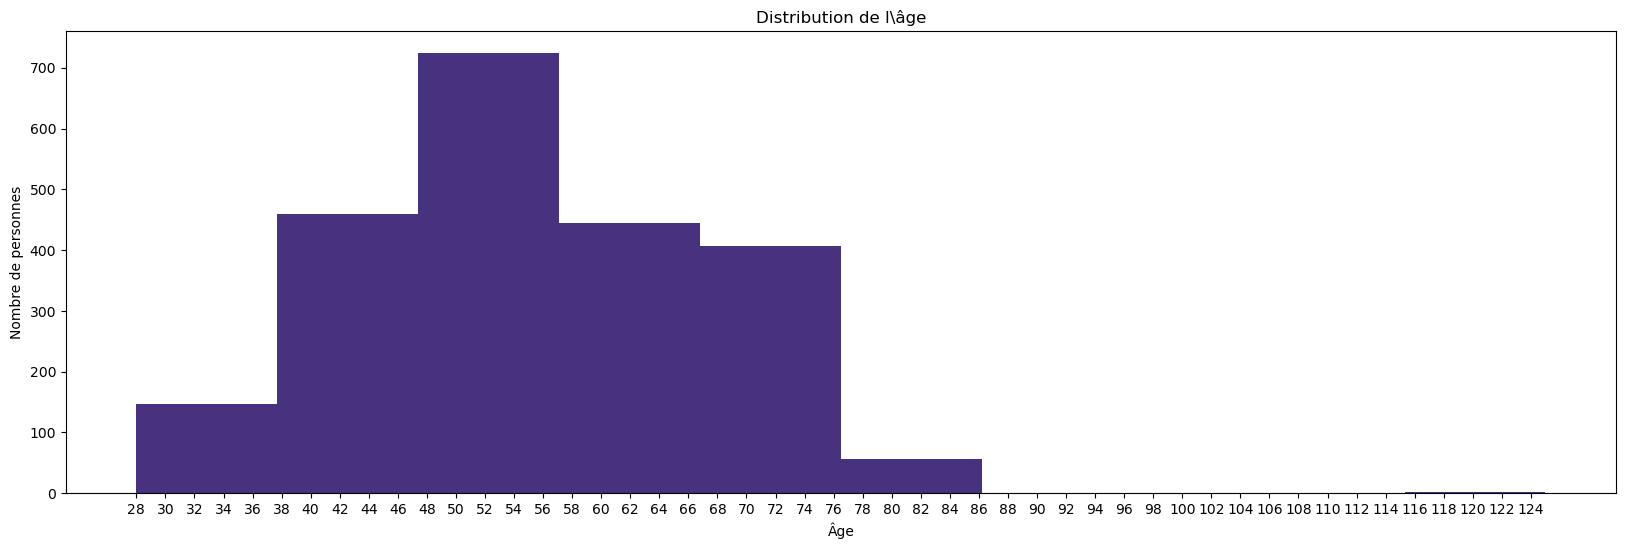

In [640]:
# Ajuster la taille de la figure (largeur, hauteur)
plt.figure(figsize=(20, 6))  # Exemple : largeur de 10 pouces et hauteur de 6 pouces

# Créer un histogramme
plt.hist(df_copie['Age'], bins=10) 
plt.xlabel('Âge')
plt.ylabel('Nombre de personnes')
plt.title('Distribution de l\âge')

# Modifier les positions des ticks sur l'axe des x
plt.xticks(range(int(df_copie['Age'].min()), int(df_copie['Age'].max())+1, 2))  # Intervalle de 2
plt.show()

On observe que plus de 700 personnes des clients sont des personnes âgés entre 48-58 ans; tandis que les minorités sont ceux entre 28-38 ans, suivi de ceux âgés de plus de 76 ans. Ce qui représente des indicateurs à prendre en compte sur la tronche d'âge des clients à cibler dans une future campagne marketing. Une remarque importante pourrait être soulevé: le fait que la classe d'âge la plus jeune soit minoritaire. D'autres analyses externes plus poussés pourraient être réalisées pour trouver des pistes de réponses.

## Analyse démographique et des comportements d'achat

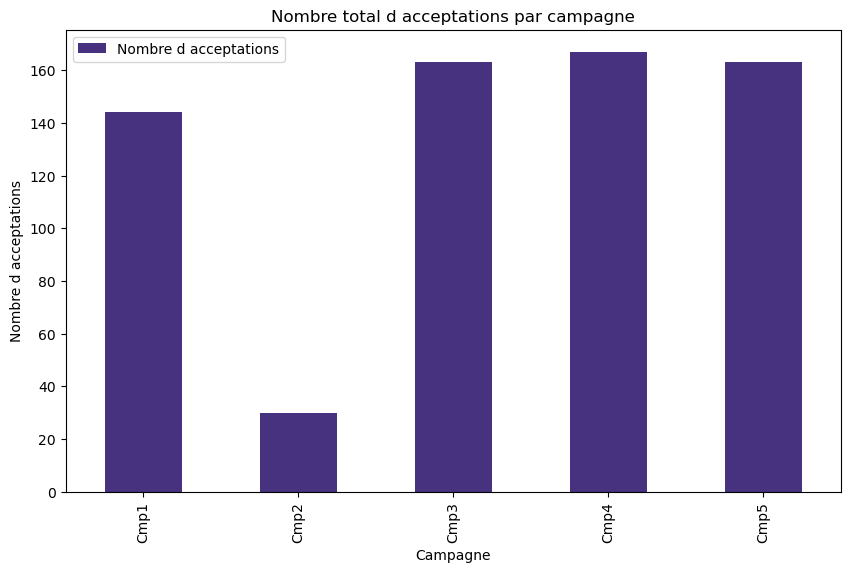

In [641]:
# Créer un nouveau DataFrame 
new_data = pd.DataFrame({'Campagne': ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5'],
                         'Nombre d acceptations': df_copie[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()})
# Créer le graphique à barres
new_data.plot(kind='bar', x='Campagne', y='Nombre d acceptations', figsize=(10, 6))
plt.title('Nombre total d acceptations par campagne')
plt.xlabel('Campagne')
plt.ylabel('Nombre d acceptations')
plt.show()

**Interpretation:**

Beaucoup de clients ont accepté l'offre lors de la 4ème campagne, suivi de très près par la 3ème et la 5ème, puis la 1ère; et en dernier lieu, la 2ème: c'est lors de la 2ème campagne punlicitaire qu'il y a le moins de personnes qui y répondent.

Total_Campaigns_Accepted: 667


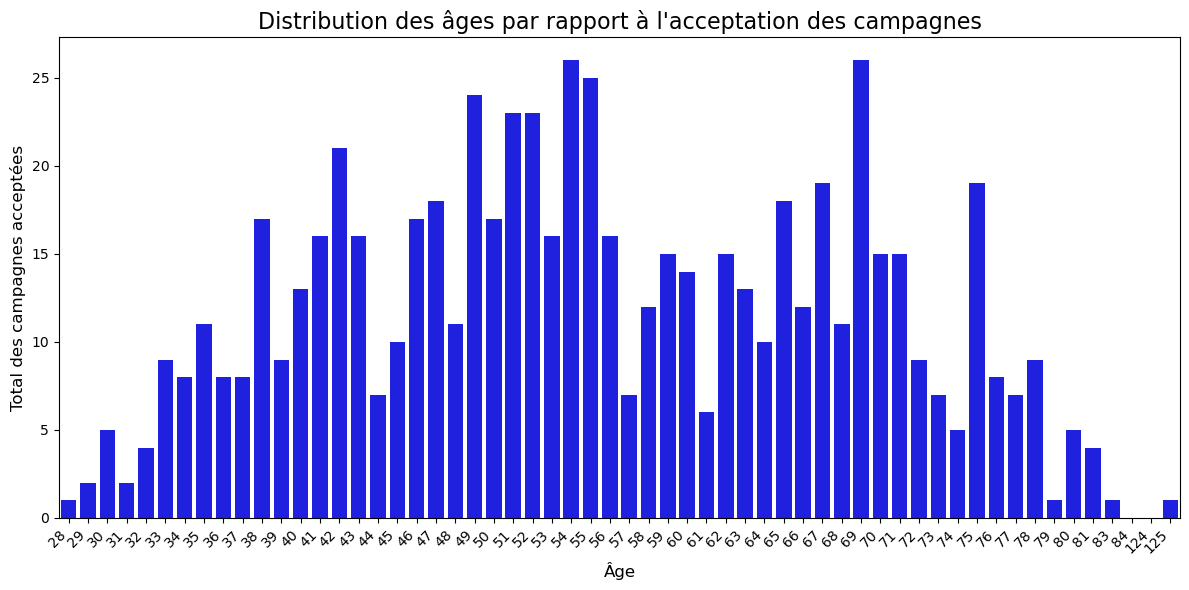

In [642]:
#Creating Total number of campaigns accepted
df_copie['Total_Campaigns_Accepted'] = df_copie[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
print("Total_Campaigns_Accepted:", df_copie['Total_Campaigns_Accepted'].sum())

# Groupement des données par âge
age_campaigns = df_copie.groupby('Age').agg({
    'Total_Campaigns_Accepted': 'sum'
}).reset_index()

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer la distribution des âges par rapport au total des campagnes acceptées
sns.barplot(x='Age', y='Total_Campaigns_Accepted', data=age_campaigns, color='blue', ax=ax)

# Configurer les axes et le titre
ax.set_title('Distribution des âges par rapport à l\'acceptation des campagnes', fontsize=16)
ax.set_xlabel('Âge', fontsize=12)
ax.set_ylabel('Total des campagnes acceptées', fontsize=12)

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

**Observation**:
Nous remarquons que ce sont les clients de 28-32 ans et 79-125 qui acceptent 5 compagnes publicitaires tout au plus: en plus d'être les classes de clients les moins nombreuses; elles sont celles aussi qui on accepté le moins de campgne markrting; et ceux qui ont en accepté le plus sont ceux âgés de 69 et 54 ans. 

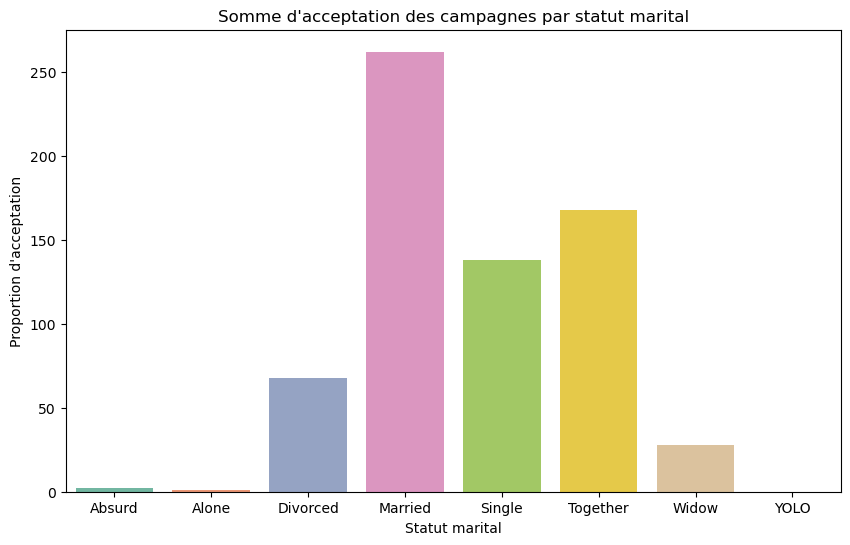

In [643]:
# Calcul de la proportion d'acceptation par statut marital
proportion_acceptation_marital = df_copie.groupby('Marital_Status')['Total_Campaigns_Accepted'].sum().reset_index(name='Proportion')

# Graphique à barres
plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique
sns.barplot(x='Marital_Status', y='Proportion', data=proportion_acceptation_marital,palette='Set2',hue='Marital_Status',legend=False)  # Palette avec plusieurs couleurs
plt.title("Somme d'acceptation des campagnes par statut marital")
plt.xlabel("Statut marital")
plt.ylabel("Proportion d'acceptation")
plt.show()

**Interprétation**: 
Nous remarquons que 38,57 % des personnes recencées sont les personnes marriées; et ce sont eux qui ont accepté le plus de campagne marketing. Ainsi, la propportion de personnes par statut marital suit la porportion de personnes recencées.

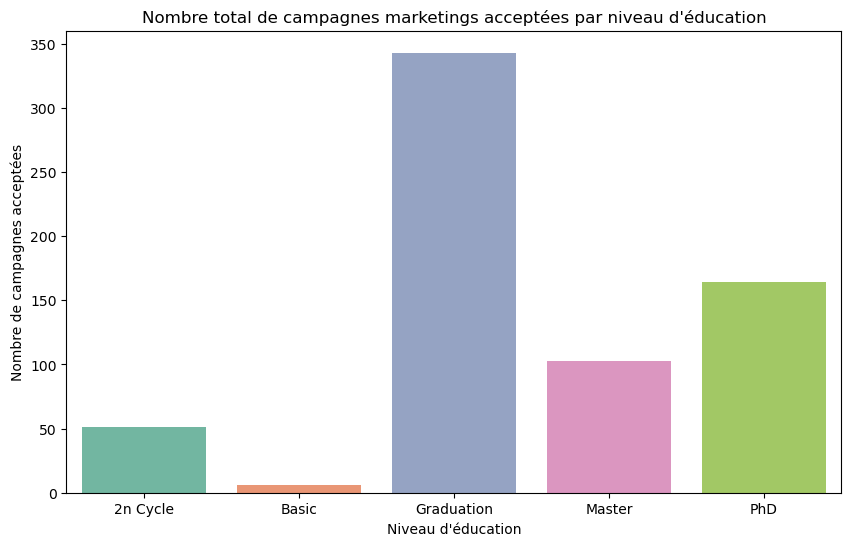

In [644]:
# Calcul du nombre total d'acceptations par niveau d'éducation
acceptations_par_education = df_copie.groupby('Education')['Total_Campaigns_Accepted'].sum().reset_index()

# Diagramme à barres
plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique
sns.barplot(x='Education', y='Total_Campaigns_Accepted', data=acceptations_par_education,palette='Set2',hue='Education',legend=False)
plt.title('Nombre total de campagnes marketings acceptées par niveau d\'éducation')
plt.xlabel('Niveau d\'éducation')
plt.ylabel('Nombre de campagnes acceptées')
plt.show()

**Interpréation:**
Par niveau d'éducation, nous remarquons que c'est le statut "Graduation" qui a accepté le plus de campagnes publicitaires. Et c'est justement elle, comme nous l'avons constaté, qui est la plus grande classe recencées parmis tous les clients. Il en va de même pour toutes les autres classes.

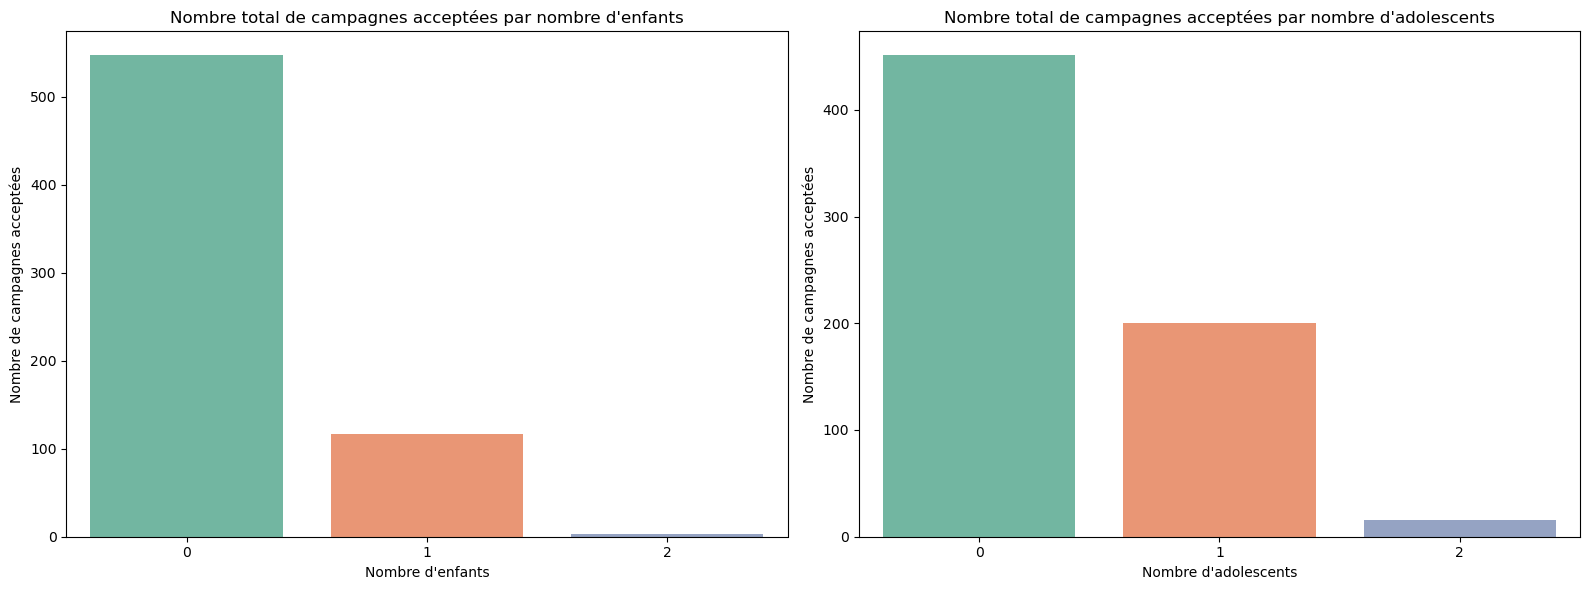

In [645]:
df_copie['TotalSpentAnnual'] = (df_copie['MntWines'] + df_copie['MntFruits'] + df_copie['MntMeatProducts'] + df_copie['MntFishProducts'] +
                                df_copie['MntSweetProducts'] + df_copie['MntGoldProds']) / 2
# Calcul des données pour les enfants
acceptations_par_enfants = df_copie.groupby('Kidhome')['Total_Campaigns_Accepted'].sum().reset_index()

# Calcul des données pour les adolescents
acceptations_par_adolescents = df_copie.groupby('Teenhome')['Total_Campaigns_Accepted'].sum().reset_index()

# Création de la figure avec deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 ligne, 2 colonnes

# Diagramme à barres pour les enfants
sns.barplot(x='Kidhome', y='Total_Campaigns_Accepted', data=acceptations_par_enfants, palette='Set2',hue='Kidhome',legend=False, ax=axes[0])
axes[0].set_title('Nombre total de campagnes acceptées par nombre d\'enfants')
axes[0].set_xlabel('Nombre d\'enfants')
axes[0].set_ylabel('Nombre de campagnes acceptées')

# Diagramme à barres pour les adolescents
sns.barplot(x='Teenhome', y='Total_Campaigns_Accepted', data=acceptations_par_adolescents, palette='Set2',hue='Teenhome',legend=False, ax=axes[1])
axes[1].set_title('Nombre total de campagnes acceptées par nombre d\'adolescents')
axes[1].set_xlabel('Nombre d\'adolescents')
axes[1].set_ylabel('Nombre de campagnes acceptées')

# Ajustement des espaces entre les graphes
plt.tight_layout()
plt.show()


**Observations:**
Parmi tous les clients recencés, ce sont ceux qui n'ont aucun enfant en bas âge qui acceptent le plus de campagnes publicitaires. Ce qui donne une idée claire du type de maison à viser. Nous observons la même chose au niveau du nombre d'adolescents.

In [646]:
print(df_copie.dtypes)

Year_Birth                    int64
Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Dt_Customer                  object
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Customer Year                 int64
Customer Month              

      TotalSpentAnnual    Income
0              808.500 58138.000
1               13.500 46344.000
2              388.000 71613.000
3               26.500 26646.000
4              211.000 58293.000
...                ...       ...
2235           670.500 61223.000
2236           222.000 64014.000
2237           620.500 56981.000
2238           421.500 69245.000
2239            86.000 52869.000

[2239 rows x 2 columns]


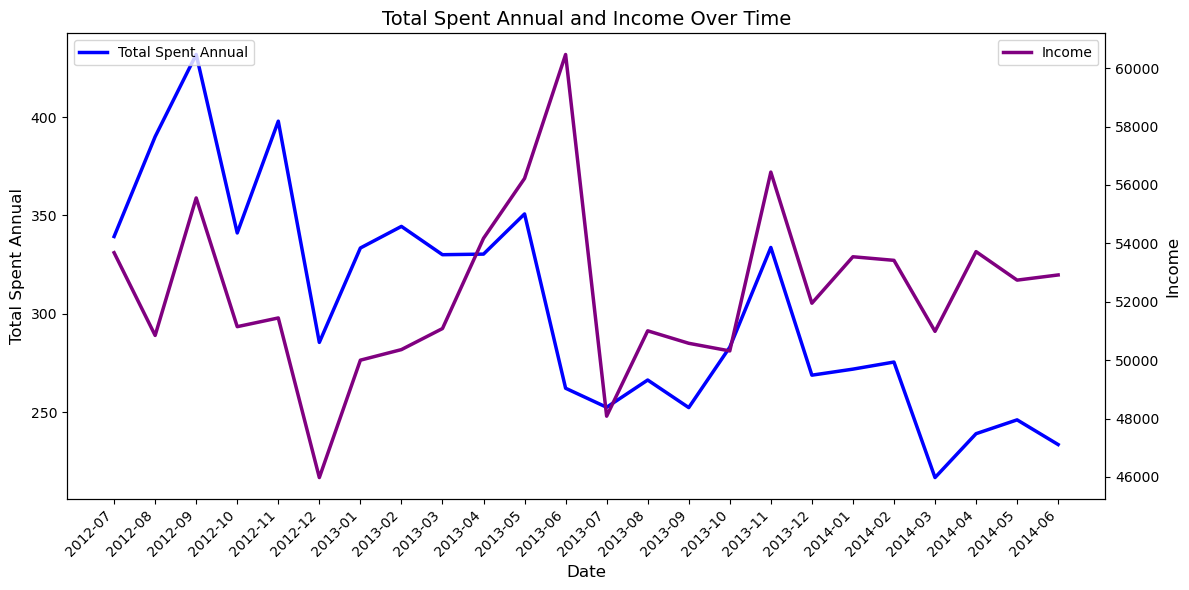

In [647]:
# Affichage pour vérifier les résultats
print(df_copie[['TotalSpentAnnual', 'Income']])

# Conversion de la colonne Dt_Customer en datetime
df_copie['Dt_Customer'] = pd.to_datetime(df_copie['Dt_Customer'])

# Grouper par année et mois (basé sur Dt_Customer)
df_copie['YearMonth'] = df_copie['Dt_Customer'].dt.to_period('M')  # Année-Mois
df_copie['YearMonth'] = df_copie['YearMonth'].astype(str)  # Convertir en string pour une meilleure gestion dans seaborn

# Calcul des métriques : somme ou moyenne selon ton besoin
metrics = df_copie.groupby('YearMonth').agg({
    'TotalSpentAnnual': 'mean',  # Moyenne des dépenses annuelles
    'Income': 'mean'  # Moyenne des revenus
}).reset_index()

# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracer 'TotalSpentAnnual' sur le premier axe
sns.lineplot(x='YearMonth', y='TotalSpentAnnual', data=metrics, color='blue', ax=ax1, label='Total Spent Annual', linewidth=2.5)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Total Spent Annual', fontsize=12)
ax1.set_title('Total Spent Annual and Income Over Time', fontsize=14)

# Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajouter un deuxième axe pour 'Income'
ax2 = ax1.twinx()  # Partage du même axe des x
ax2.set_ylabel('Income', fontsize=12)
sns.lineplot(x='YearMonth', y='Income', data=metrics, color='purple', ax=ax2, label='Income', linewidth=2.5)

# Ajouter les légendes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1, labels_1, loc='upper left')
ax2.legend(lines_2, labels_2, loc='upper right')

# Améliorer l'affichage et l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()
df_copie.drop(columns=['YearMonth'], inplace=True)

**Analyse**: Nous pouvons observer que sur certaines périodes, tandis que le revenu baisse, le total dépensé, lui, augmente. A l'exemple de la période de juillet 2012. Aussi, sur la période de 05-2013, tandis que le revenu augmente, le total dépensé, lui, diminue. Le revenu subit certaines chutes comme en novembre 2012 ou encore en juin 2013. Néanmoins, nous pouvons observer une certaine "stabilité" en février 2014 par rapport aux autres périodes. Et en général, depuis juillet 2012 à juin 2014, le total dépensé diminue; en effet, nous avons une augmentation pour les deux premiers mois et même si, sur certaines périodes, le montant dépensé augmente, il atteint sa pire valeur en mars 2014. 

Le produit qui a généré le plus de revenus est : MntWines avec 680808.00 'unités monétaires'.


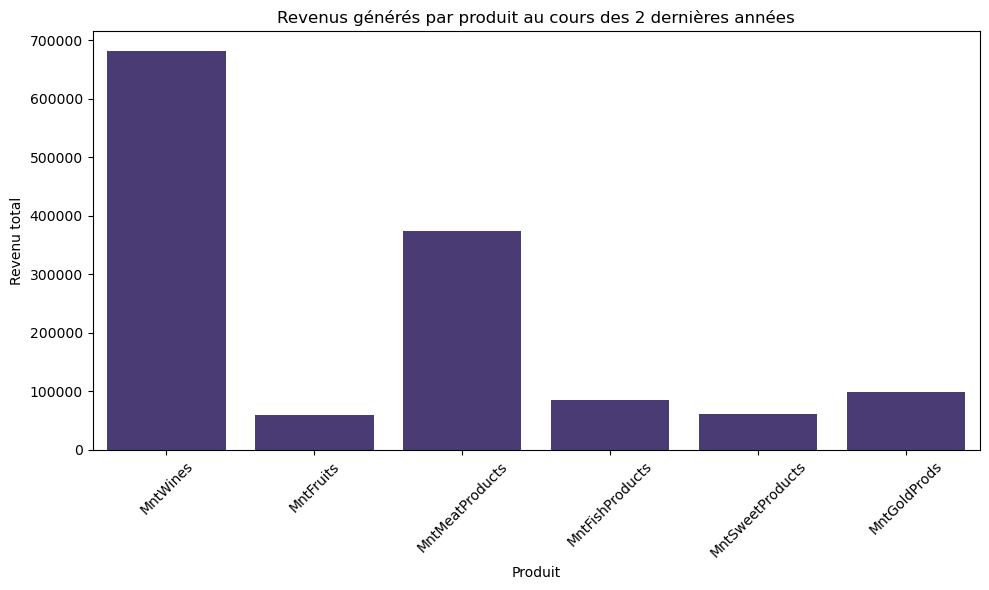

In [648]:
# Liste des colonnes représentant les produits
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# total des montants pour chaque produit
total_revenue = {product: df_copie[product].sum() for product in product_columns}

#  produit qui a généré le plus de revenu
max_revenue_product = max(total_revenue, key=total_revenue.get)
print(f"Le produit qui a généré le plus de revenus est : {max_revenue_product} avec {total_revenue[max_revenue_product]:.2f} 'unités monétaires'.")

# Créer un DataFrame pour visualisation
revenue_df_copie = pd.DataFrame(list(total_revenue.items()), columns=['Produit', 'Revenu'])

# Définir la palette globalement
sns.set_palette('viridis')

# Représentation graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Produit', y='Revenu', data=revenue_df_copie)
plt.title('Revenus générés par produit au cours des 2 dernières années')
plt.xlabel('Produit')
plt.ylabel('Revenu total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations:
Le produit qui a généré le plus de revenus à l'entreprise est les vins avec un revenu total pas loin de 700000(prix), suivi par les produits carnés(MntMeatProducts), etc. Ainsi, les produits a avoir été acheté le moins de fois au cours des 2 dernières années sont les fruits avec près de 50000(prix).

In [649]:
#  Nombre de clients qui se sont plaints
total_plaintes = df_copie['Complain'].sum()
print("Nombre total de plaintes :", total_plaintes)

Nombre total de plaintes : 21


Interprétation:
Sur un total de 2239 clients, 21 se sont plaintes; ce qui ne représente pas en terme d"échelles une grande inquiétude pour l'entreprise, mais qui est prise en compte dans la fidélisation des clients.

In [650]:
# Temps maximum et minimum entre le dernier achat
temps_max = df_copie['Recency'].max()
temps_min = df_copie['Recency'].min()
print("Temps maximum entre le dernier achat :", temps_max)
print("Temps minimum entre le dernier achat :", temps_min)

Temps maximum entre le dernier achat : 99
Temps minimum entre le dernier achat : 0


Interpretation:
99 est le maximum de jours écoulés entre un dernier achat.Cela veut dire qu'on a au moins un client dont le dernier achat remonte à 99 jours,soit près de 3 mois et demi; tandis que 0 jours pour le minimum veut dire qu'au moins 1 client a effectué 1 achat le même jour qu'il a effectué son dernier achat. Certains clients ont donc une fréquence d'achats plus faible que d'autres.

In [651]:
# Calculer le nombre total d'achats
df_copie['TotalPurchases'] = df_copie['NumWebPurchases'] + df_copie['NumCatalogPurchases'] + df_copie['NumStorePurchases'] # TotalPurchases: total d'achats
# Comparer avec les achats effectués grâce à une remise
df_copie['ProportionDeals'] = df_copie['NumDealsPurchases'] / df_copie['TotalPurchases']

# Résumé global
total_Purchases = df_copie['TotalPurchases'].sum()
total_Deals = df_copie['NumDealsPurchases'].sum() # total_Deals: total d'achats avec remises
proportion_globale = total_Deals / total_Purchases

print(f"Nombre total d'achats : {total_Purchases}")
print(f"Nombre total d'achats avec remise : {total_Deals}")
print(f"Proportion globale d'achats avec remise : {proportion_globale:.2%}")
df_copie.drop(columns=['TotalPurchases'], inplace=True) # pour éviter que la colonne ne soit enregistrée dans mon dataset
df_copie.drop(columns=['ProportionDeals'], inplace=True)


Nombre total d'achats : 28080
Nombre total d'achats avec remise : 5207
Proportion globale d'achats avec remise : 18.54%


**Proportion de 18.54%**: 
Cela signifie qu'environ un achat sur cinq est effectué grâce à une remise.

**Implication pour la stratégie de marketing**: Les remises jouent un rôle significatif, mais elles ne sont pas le principal moteur des ventes (plus de 80% des achats sont réalisés sans remise).
Cela peut indiquer que les clients ne dépendent pas entièrement des remises pour effectuer leurs achats, suggérant une base de clients relativement loyale ou insensible aux réductions.

In [652]:
# date d'inscription min et max du client auprès de l'entreprise 
Dt_max = df_copie['Dt_Customer'].max()
Dt_min = df_copie['Dt_Customer'].min()
print("date d'inscription maximum du client auprès de l'entreprise  :", Dt_max)
print("date d'inscription minimum du client auprès de l'entreprise :", Dt_min)

date d'inscription maximum du client auprès de l'entreprise  : 2014-06-29 00:00:00
date d'inscription minimum du client auprès de l'entreprise : 2012-07-30 00:00:00


# Observations générales: 
**Ces analyses sur les features ou les relations entre elles offre des perspsectives sur l'orientation des campagnes marketing afin d'augmenter le nombre de client.** 

In [653]:
# Extraire les valeurs uniques de la colonne "Education" et "Marital_Status"
unique_education = df_copie['Education'].unique()
unique_marital_status = df_copie['Marital_Status'].unique()

# Affichage des valeurs uniques
print("Valeurs uniques dans 'Education' :")
print(unique_education)

print("\nValeurs uniques dans 'Marital_Status' :")
print(unique_marital_status)

# Utilisation de enumerate pour créer un dictionnaire de correspondance pour chaque colonne
lookup_education = {value: i for i, value in enumerate(unique_education)}
lookup_marital_status = {value: i for i, value in enumerate(unique_marital_status)}

# Affichage des dictionnaires de correspondance
print("\nDictionnaire de correspondance pour 'Education' :")
print(lookup_education)

print("\nDictionnaire de correspondance pour 'Marital_Status' :")
print(lookup_marital_status)

# Appliquer ces dictionnaires pour attribuer un nombre à chaque catégorie dans chaque colonne
df_copie['Education'] = df_copie['Education'].map(lookup_education)
df_copie['Marital_Status'] = df_copie['Marital_Status'].map(lookup_marital_status)

# Affichage du data modifié
print("\nData avec les catégories transformées en nombres :")
print(df_copie)
# Enregistrer les modifications dans le fichier CSV
df_copie.to_csv(r'C:\Users\Utilisateur\Downloads\copie0_marketing_campaign.csv', index=False)


Valeurs uniques dans 'Education' :
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Valeurs uniques dans 'Marital_Status' :
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Dictionnaire de correspondance pour 'Education' :
{'Graduation': 0, 'PhD': 1, 'Master': 2, 'Basic': 3, '2n Cycle': 4}

Dictionnaire de correspondance pour 'Marital_Status' :
{'Single': 0, 'Together': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4, 'Alone': 5, 'Absurd': 6, 'YOLO': 7}

Data avec les catégories transformées en nombres :
      Year_Birth  Education  Marital_Status    Income  Kidhome  Teenhome Dt_Customer  Recency  \
0           1957          0               0 58138.000        0         0  2012-09-04       58   
1           1954          0               0 46344.000        1         1  2014-03-08       38   
2           1965          0               1 71613.000        0         0  2013-08-21       26   
3           1984          0               1 26646.000        1         0  2014-

In [654]:
df_copie['Dt_Customer'] = pd.to_datetime(df_copie['Dt_Customer'])
# Afficher le nom de chaque colonne et son type
for column in df_copie.columns:
    print(f"Colonne: {column} - Type: {df_copie[column].dtype}")

Colonne: Year_Birth - Type: int64
Colonne: Education - Type: int64
Colonne: Marital_Status - Type: int64
Colonne: Income - Type: float64
Colonne: Kidhome - Type: int64
Colonne: Teenhome - Type: int64
Colonne: Dt_Customer - Type: datetime64[ns]
Colonne: Recency - Type: int64
Colonne: MntWines - Type: int64
Colonne: MntFruits - Type: int64
Colonne: MntMeatProducts - Type: int64
Colonne: MntFishProducts - Type: int64
Colonne: MntSweetProducts - Type: int64
Colonne: MntGoldProds - Type: int64
Colonne: NumDealsPurchases - Type: int64
Colonne: NumWebPurchases - Type: int64
Colonne: NumCatalogPurchases - Type: int64
Colonne: NumStorePurchases - Type: int64
Colonne: NumWebVisitsMonth - Type: int64
Colonne: AcceptedCmp3 - Type: int64
Colonne: AcceptedCmp4 - Type: int64
Colonne: AcceptedCmp5 - Type: int64
Colonne: AcceptedCmp1 - Type: int64
Colonne: AcceptedCmp2 - Type: int64
Colonne: Complain - Type: int64
Colonne: Response - Type: int64
Colonne: Customer Year - Type: int64
Colonne: Customer Mo

In [655]:
# Statistical Summary
pd.set_option('display.width', 100)  # Set the display width to 100 characters
pd.set_option('display.precision', 1)  # Set the precision for floating-point numbers to 3 decimal places

description = df_copie.describe()
print(description)

       Year_Birth  Education  Marital_Status     Income  Kidhome  Teenhome  \
count    2239.000   2239.000        2239.000   2239.000 2239.000  2239.000   
mean     1968.840      0.981           1.498  52243.707    0.444     0.506   
min      1899.000      0.000           0.000   1730.000    0.000     0.000   
25%      1959.000      0.000           1.000  35533.500    0.000     0.000   
50%      1970.000      0.000           2.000  51717.000    0.000     0.000   
75%      1977.000      2.000           2.000  68298.500    1.000     1.000   
max      1996.000      4.000           7.000 666666.000    2.000     2.000   
std        11.879      1.256           1.074  25042.828    0.538     0.545   

                         Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp1  \
count                           2239 2239.000  2239.000   2239.000  ...      2239.000   
mean   2013-07-10 06:41:57.909781248   49.121   304.068     26.314  ...         0.064   
min              2012-07-30 00

# Analyse:
*Year_Birth*: **Moyenne** : 1968, ce qui indique une population majoritairement âgée d'environ 55 ans.

*Income*: **Moyenne**: 52,243.7, mais **l'écart type** est élevé (25,042.8), ce qui indique une **grande disparité dans les revenus**, ce qui s'explique bien par le total de chaque catégorie dans la colonne "Education".

*Kidhome, Teenhome*: La majorité des participants ont 0 ou 1 enfant, comme l’indiquent les percentiles (50% ont 0 enfant pour les deux colonnes).

*Total_Campaigns_Accepted*: Moyenne très faible (0.3): peu de participants ont accepté une campagne marketing, suggérant une faible efficacité globale.


# Scaling

In [656]:
df_copie.drop(columns=['Dt_Customer'], inplace=True)
df_copie.drop(columns=['Age'], inplace=True)

Skewness de chaque colonne :


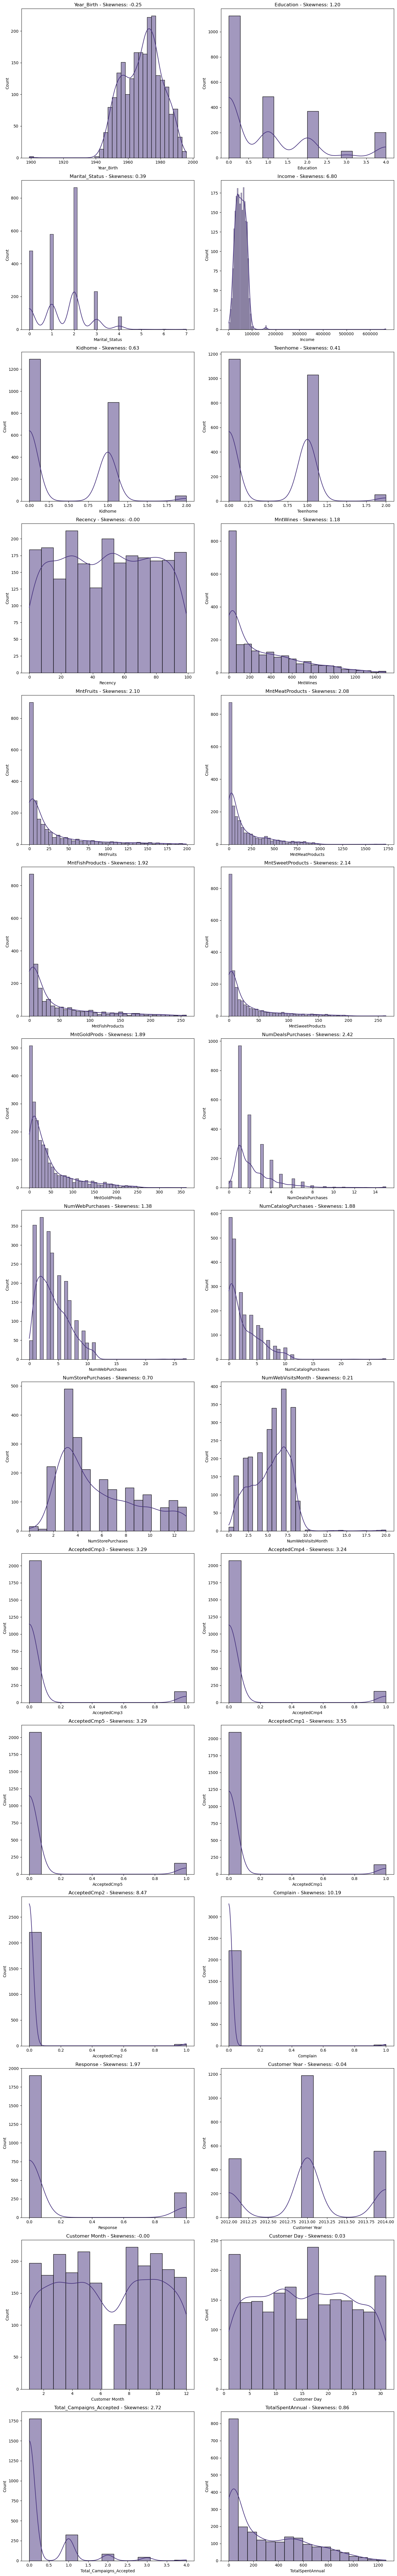

In [657]:
# Calculer la skewness pour chaque colonne numérique
skewness = df_copie.skew()

# Afficher la skewness de chaque colonne
print("Skewness de chaque colonne :")

# Visualisation des distributions
n = len(df_copie.columns)  # Nombre total de colonnes
fig, axes = plt.subplots(nrows=n//2 + n%2, ncols=2, figsize=(14, 6 * (n//2 + n%2)))

# Aplatir la grille d'axes pour faciliter l'indexation
axes = axes.flatten()

# Boucle pour tracer chaque histogramme et KDE pour chaque colonne
for i, column in enumerate(df_copie.select_dtypes(include=['float64', 'int64']).columns):
    sns.histplot(df_copie[column], kde=True, ax=axes[i])
    axes[i].set_title(f'{column} - Skewness: {skewness[column]:.2f}')

# Ajuster l'espacement des graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


**Analyses**: les colonnes avec des skewness < 0,05 semblent suivre une distribution normale; ce qui n'est pas le cas des auutres colonnes. Pour les colonnes avec une skewness légèrement négative comme "Year_Birth"(-0,25) ou "Customer Year" (-0,04), les valeurs sont relativement faibles, ce qui suggère que la distribution est près de la symétrie. 

# Data preparation to correct the skew

**La transformation Yeo-Johnson semble la bonne méthode pour corriger la skewness, car elle prend en charge les valeurs négatives voir nulles des skewness.**

Colonnes avec une skewness élevée : ['Education', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Total_Campaigns_Accepted']


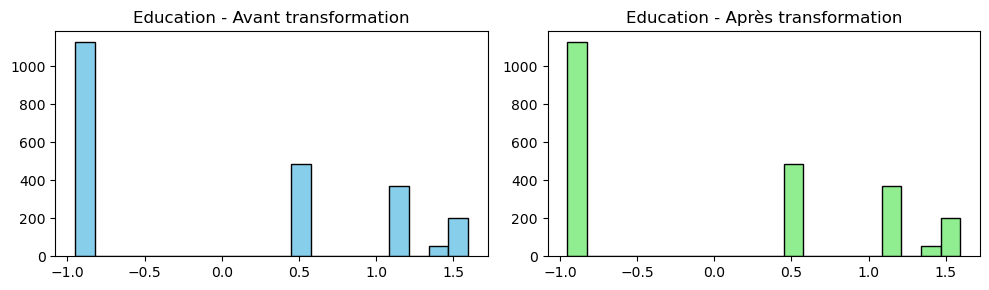

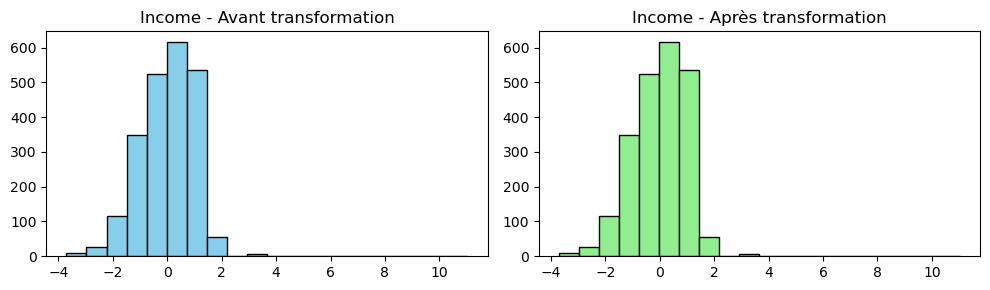

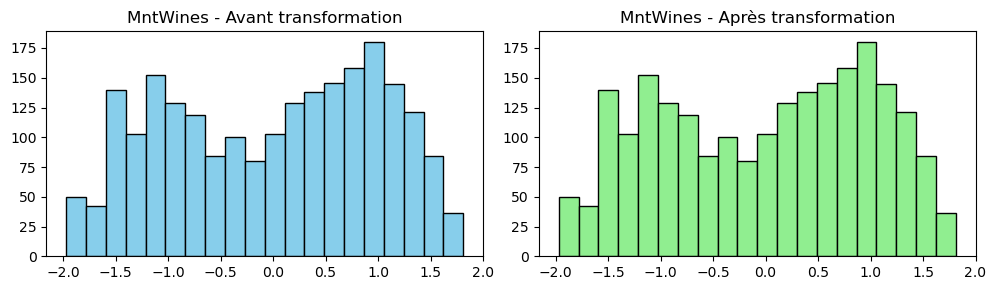

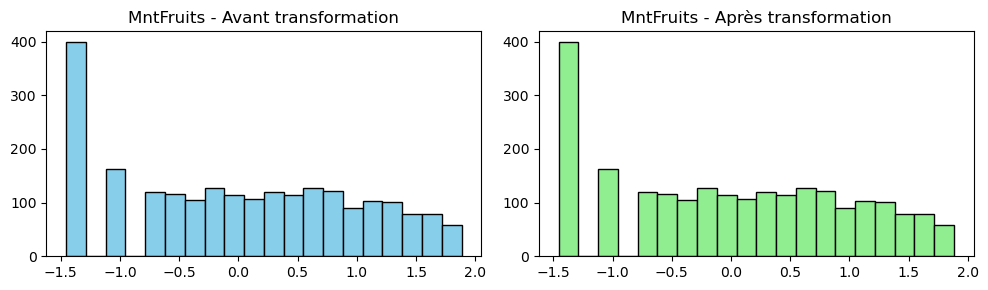

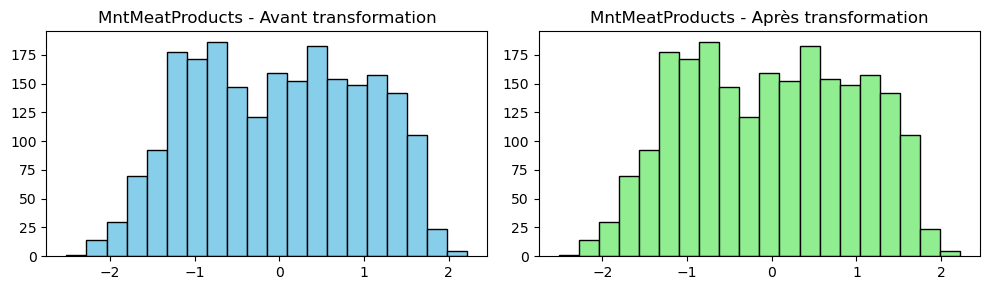

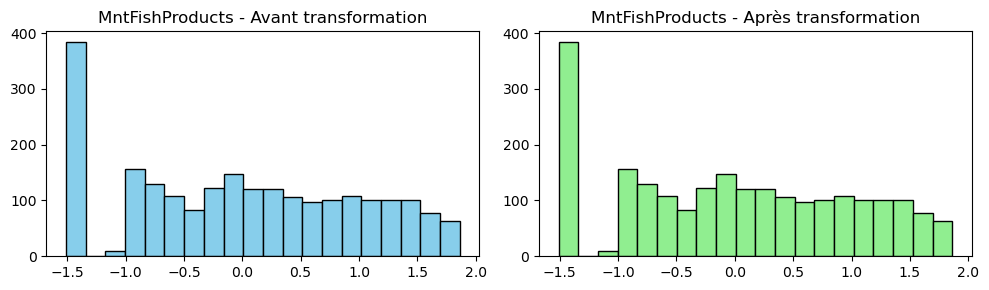

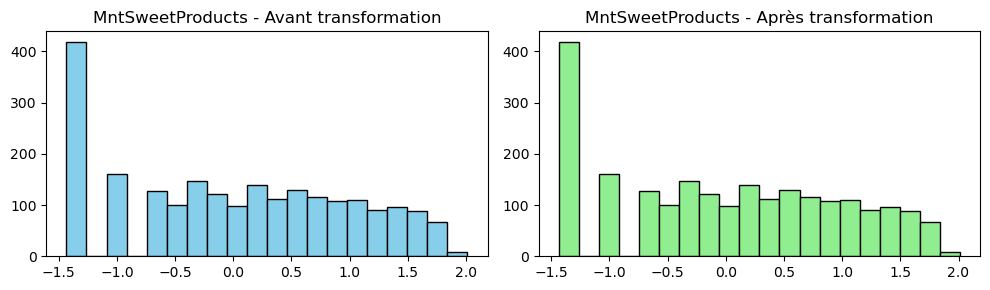

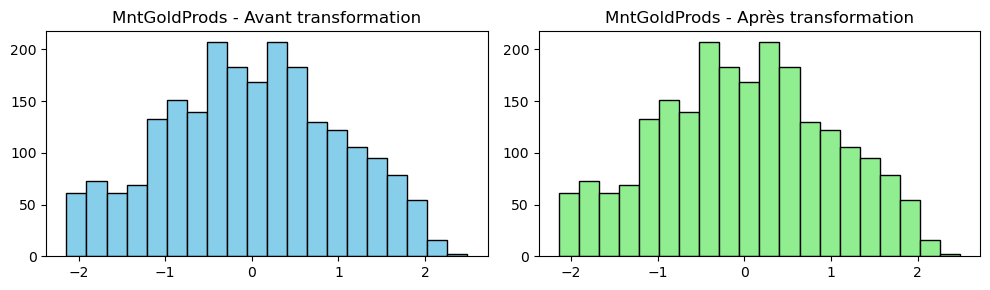

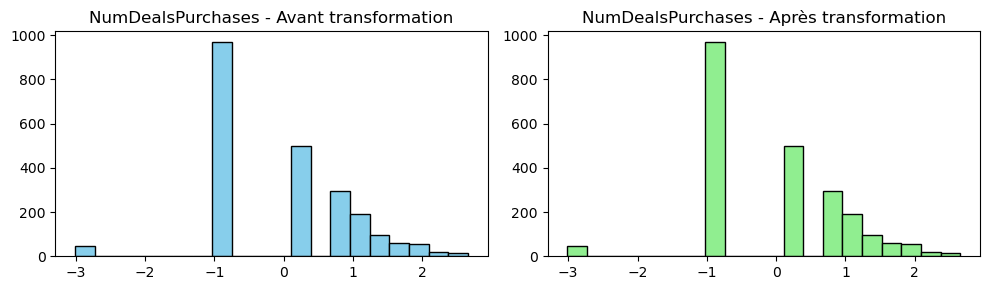

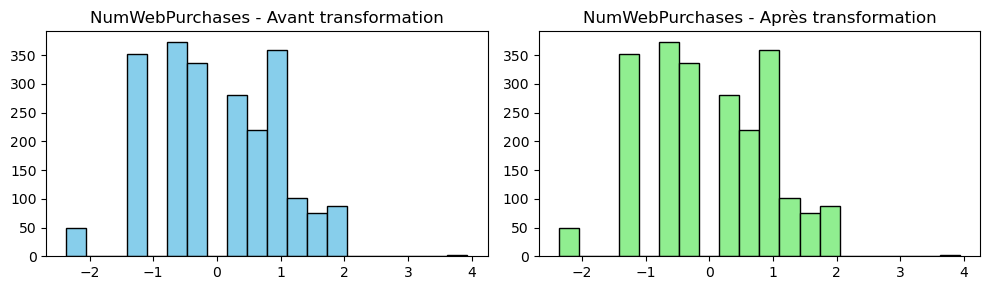

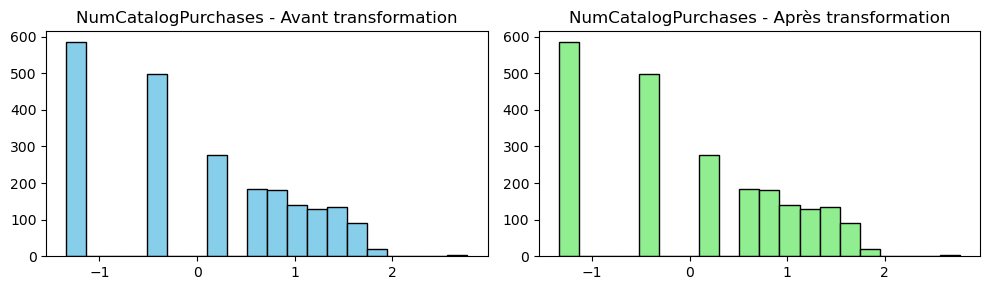

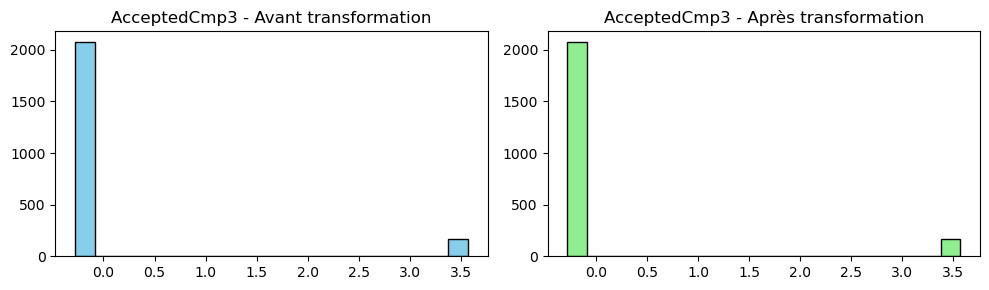

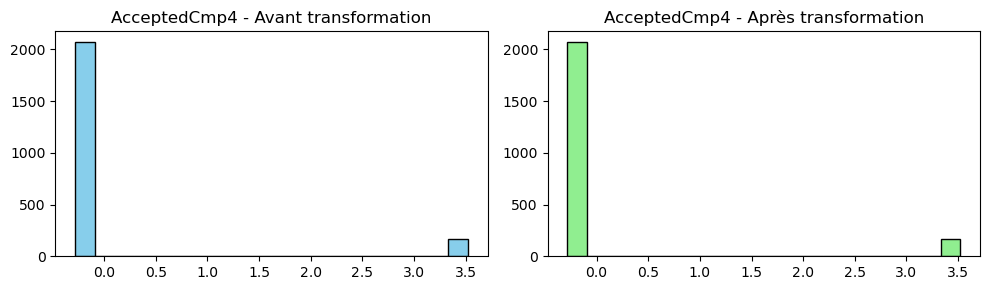

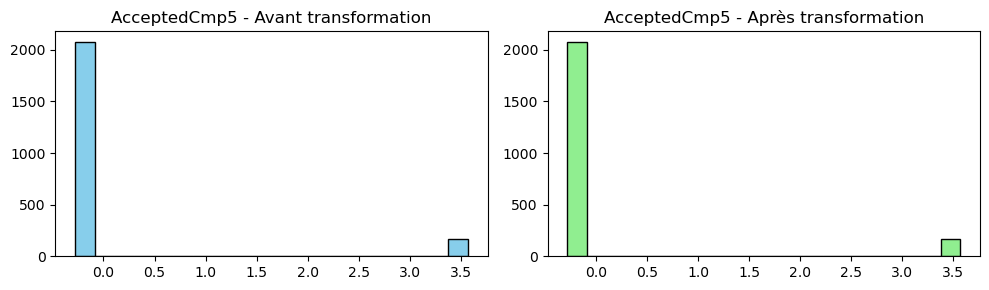

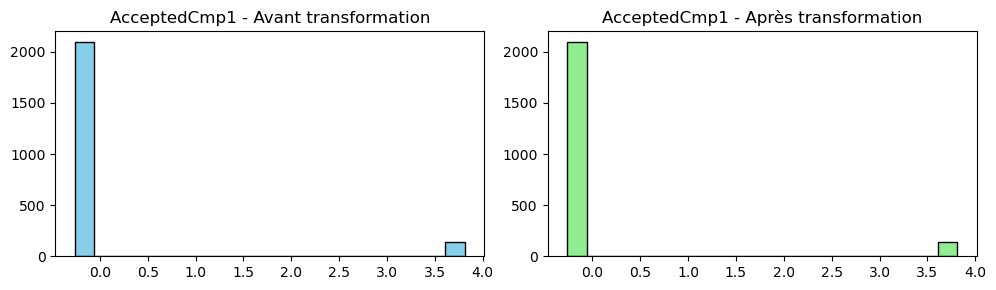

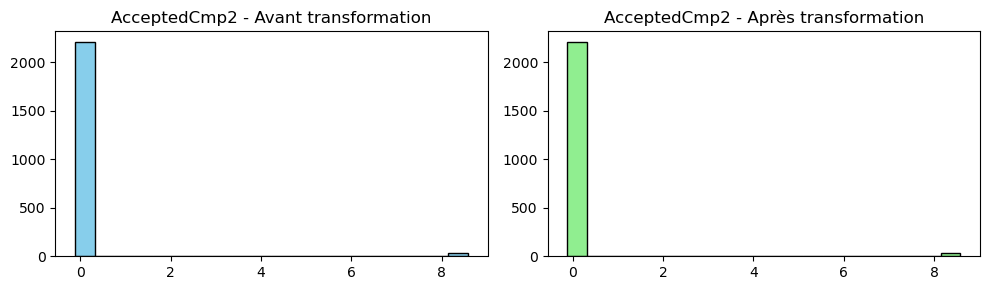

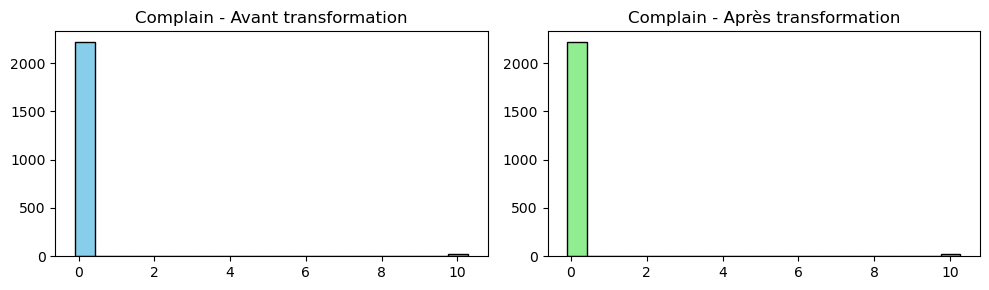

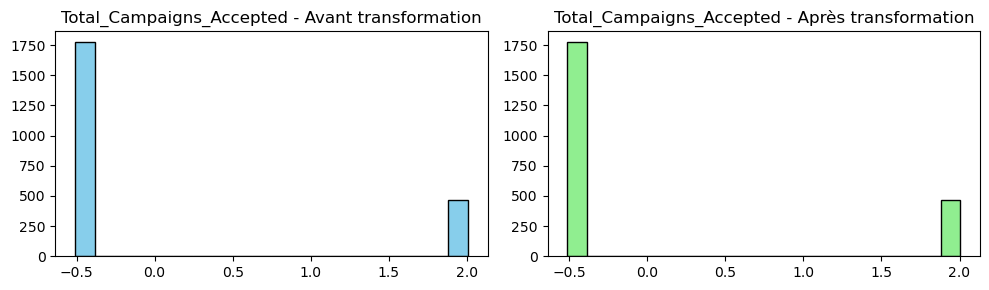

In [658]:
from sklearn.preprocessing import PowerTransformer

threshold = 1
skewness = df_copie.skew()

highly_skewed_cols = skewness[abs(skewness) > threshold].index.tolist()
print("Colonnes avec une skewness élevée :", highly_skewed_cols)

 #Exclure la colonne 'Response' de la transformation
highly_skewed_cols = [col for col in highly_skewed_cols if col != 'Response']

# Initialiser la transformation Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Appliquer la transformation Yeo-Johnson sur les colonnes avec une skewness élevée
for col in highly_skewed_cols:
    df_copie[col] = pt.fit_transform(df_copie[[col]])

    # Afficher les histogrammes avant et après la transformation
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.hist(df_copie[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col} - Avant transformation')
    plt.grid(False)  # Désactive les grilles
    
    plt.subplot(1, 2, 2)
    plt.hist(df_copie[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'{col} - Après transformation')
    plt.grid(False)  # Désactive les grilles
    plt.tight_layout()
    plt.show()

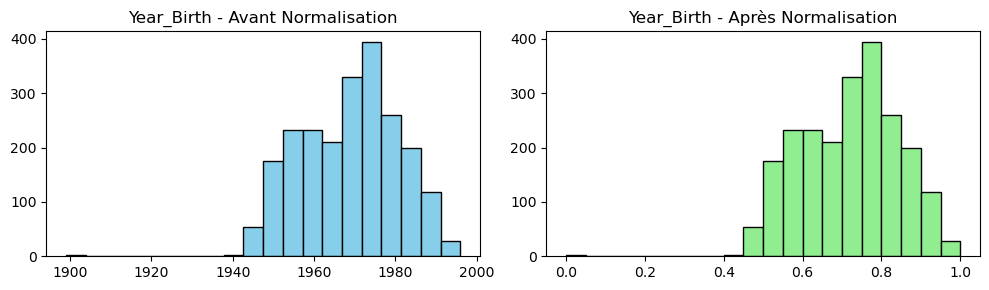

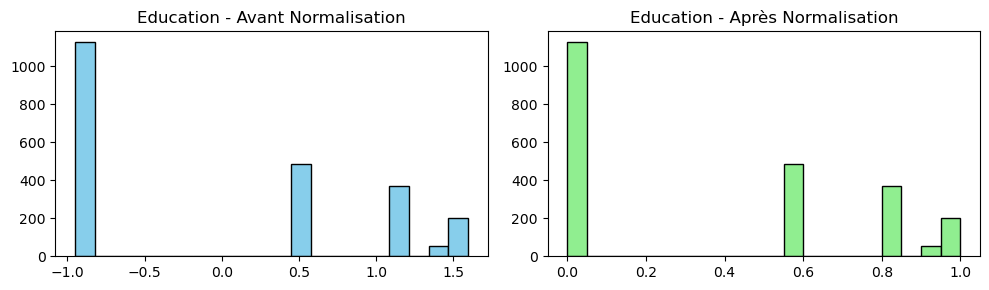

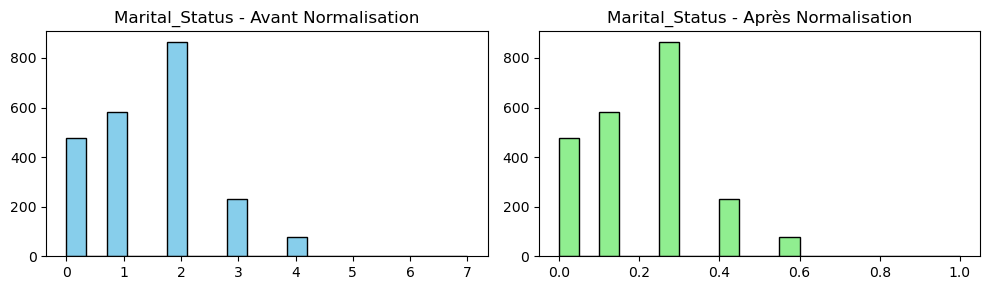

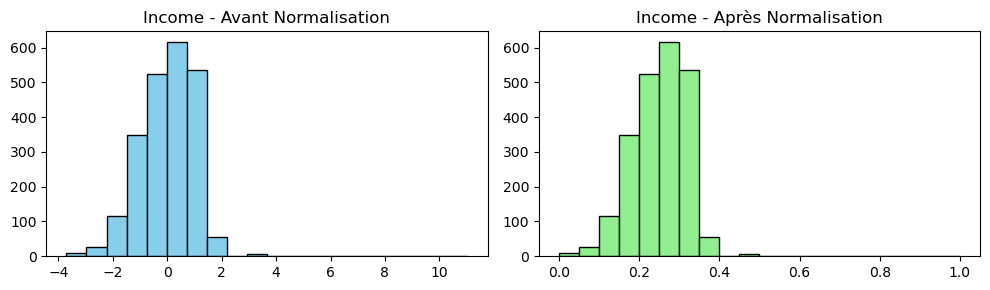

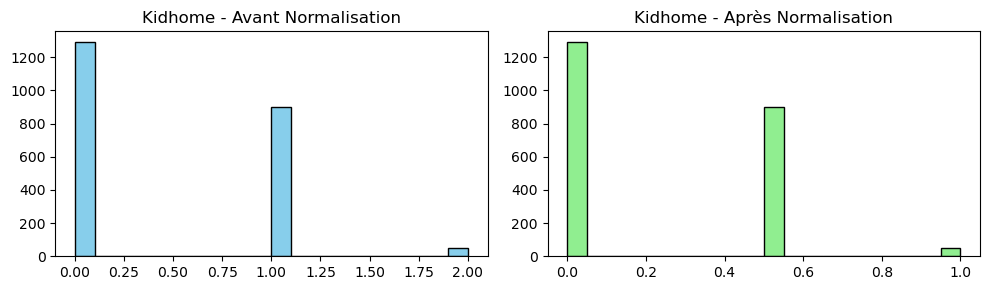

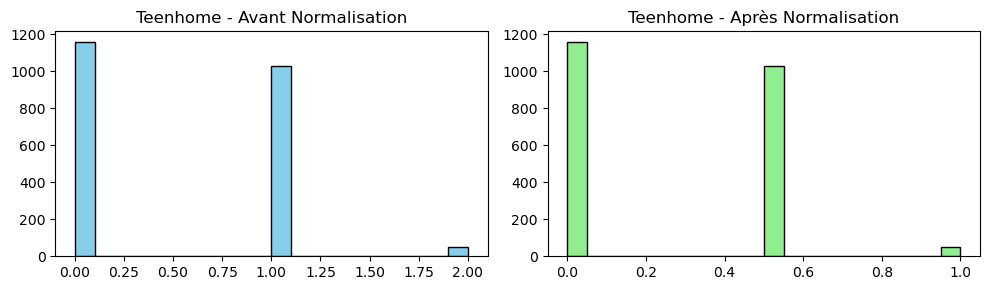

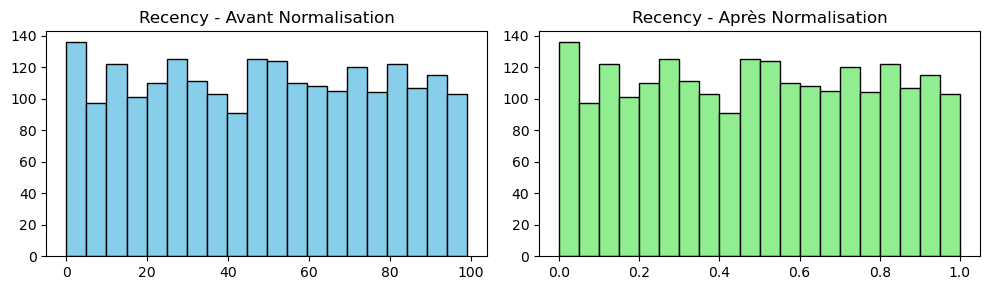

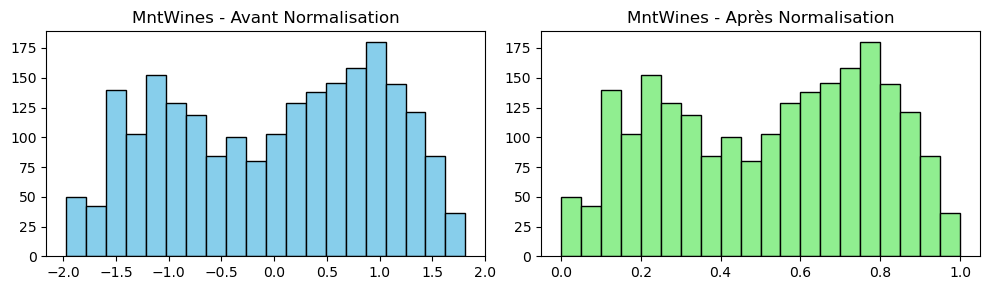

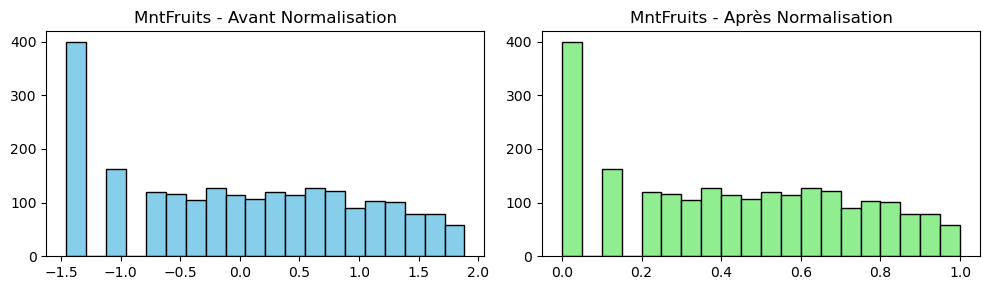

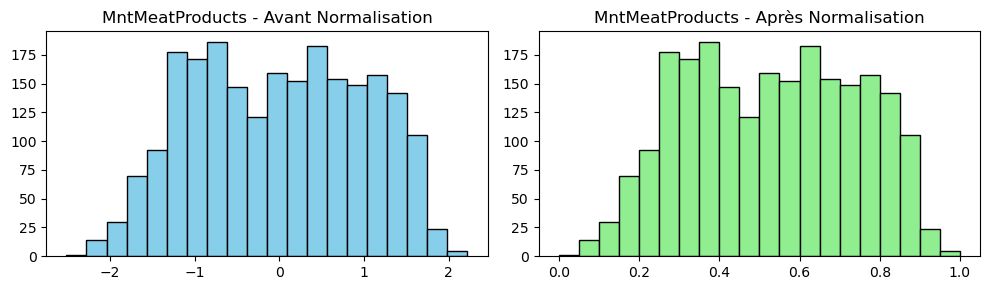

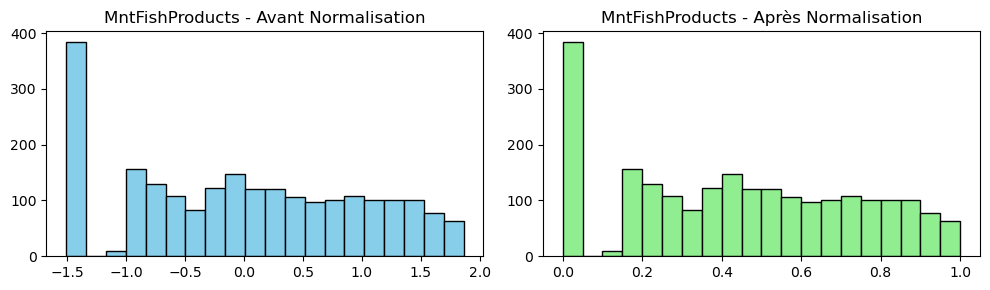

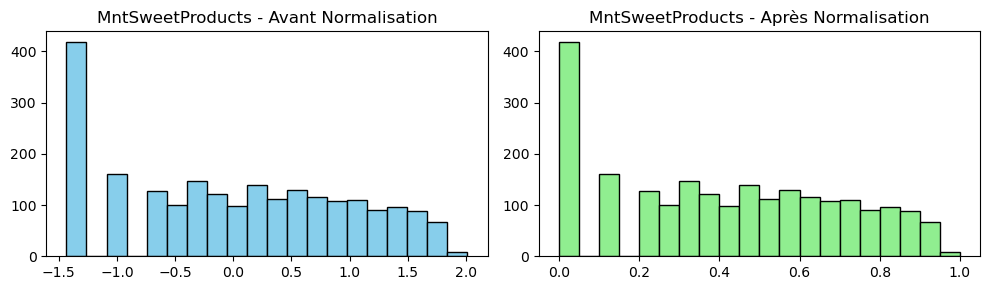

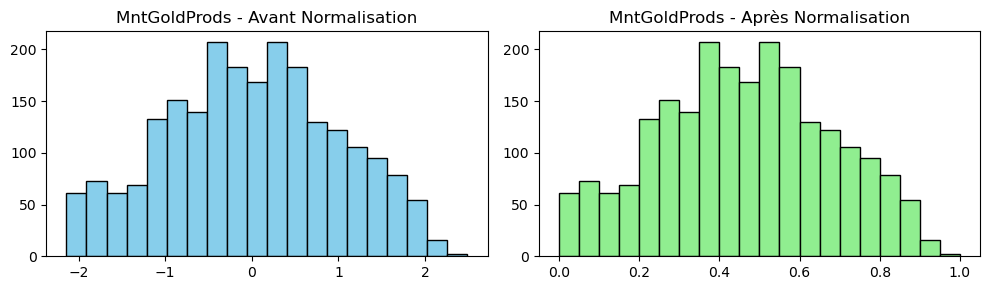

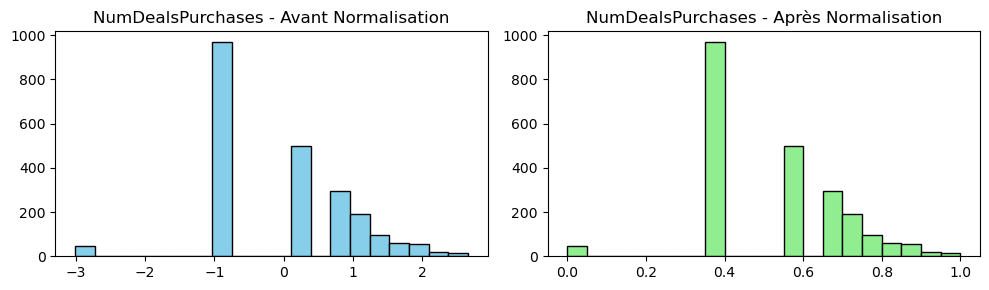

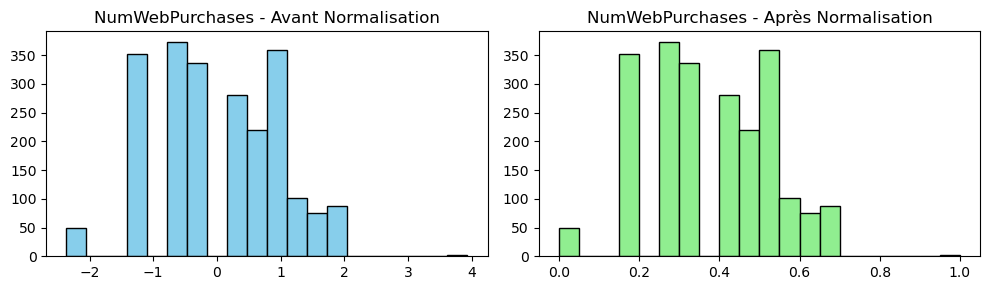

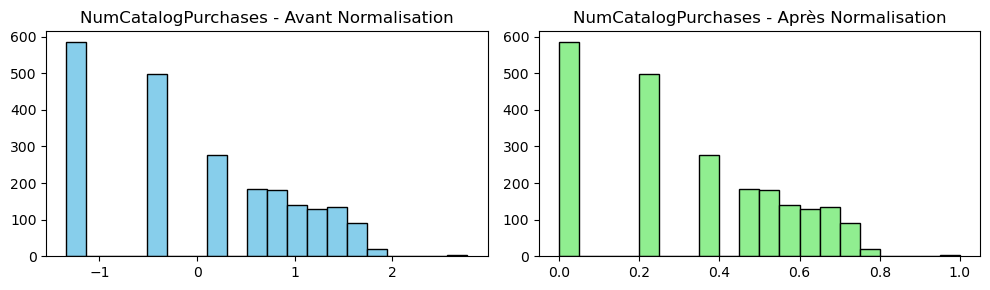

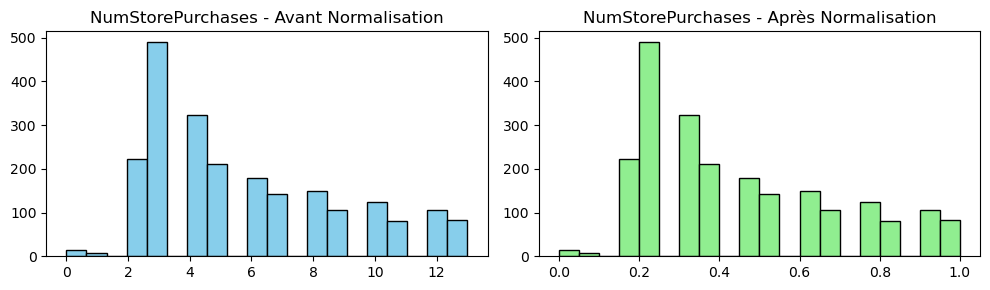

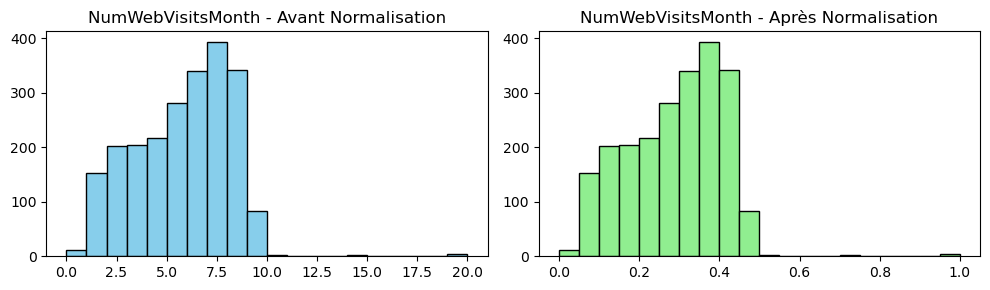

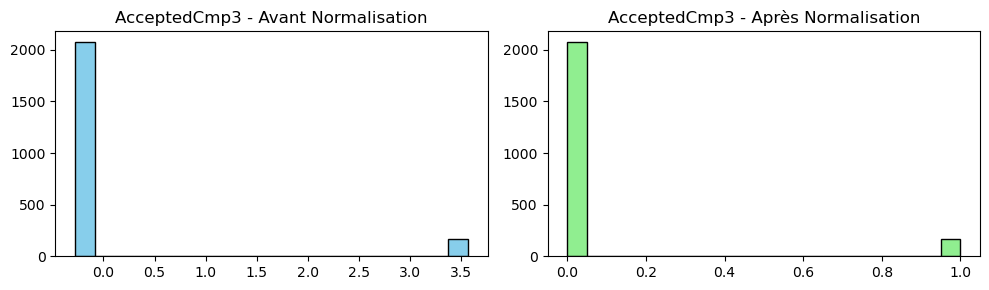

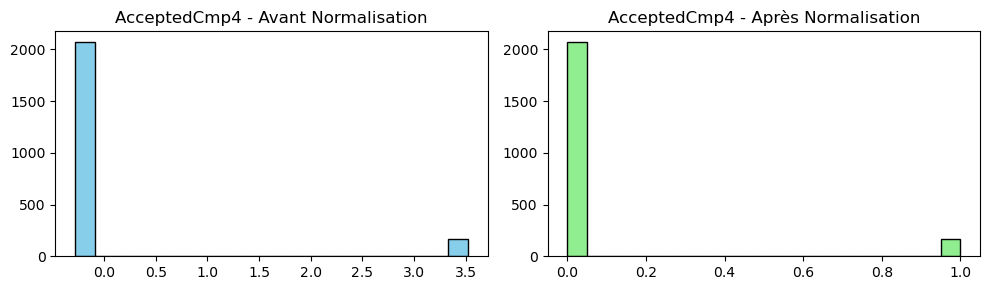

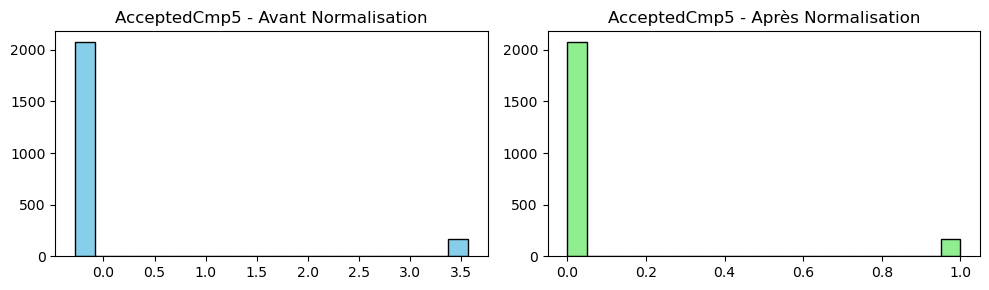

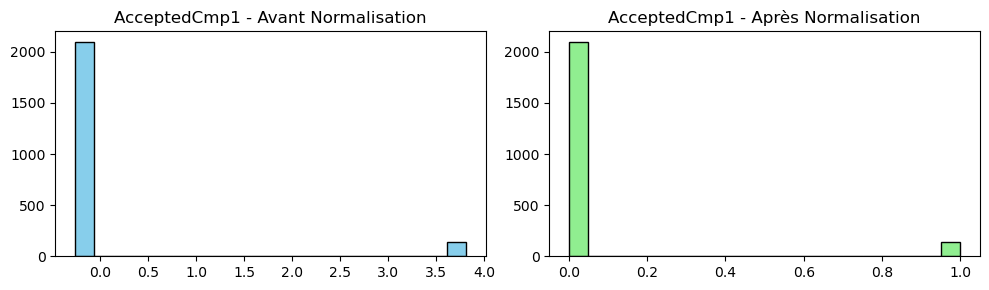

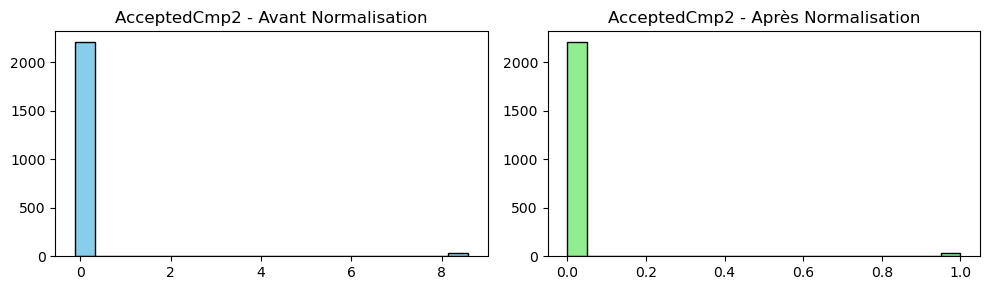

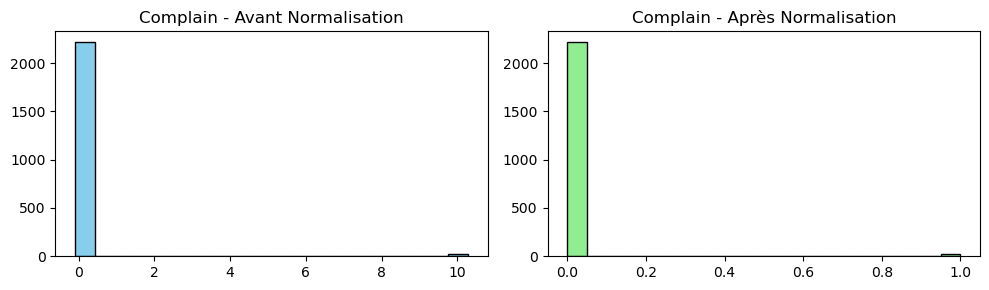

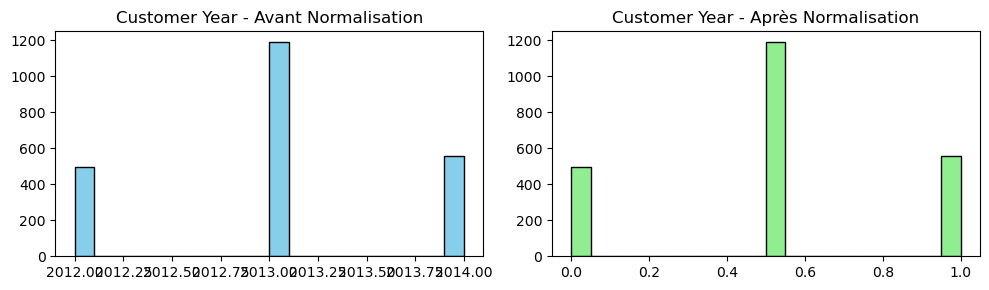

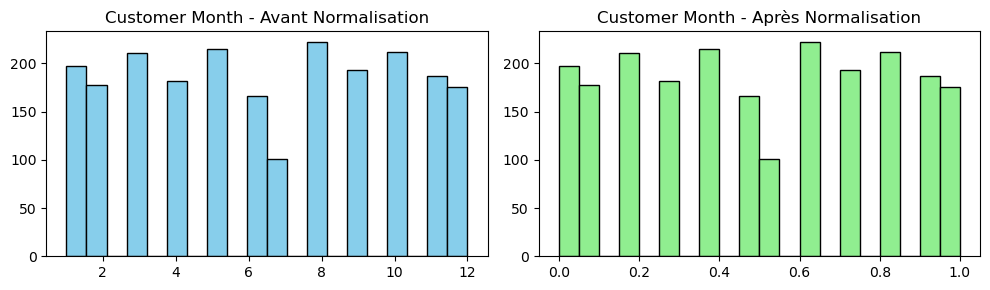

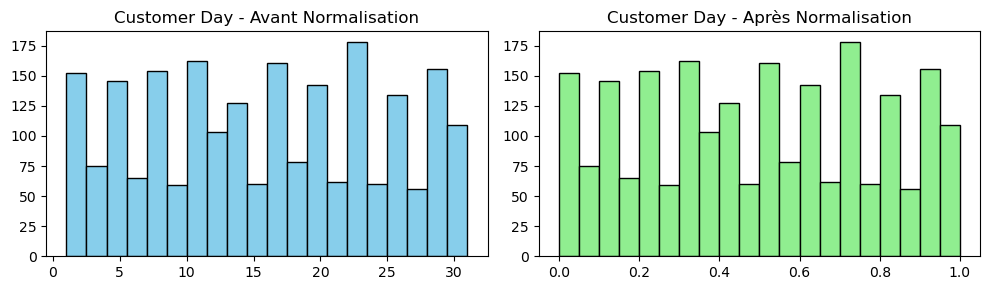

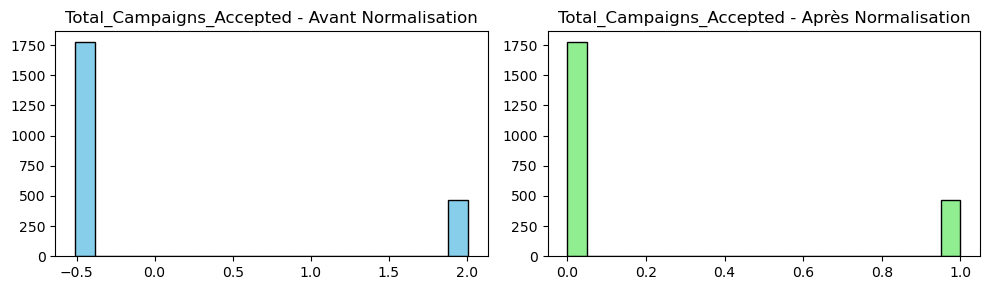

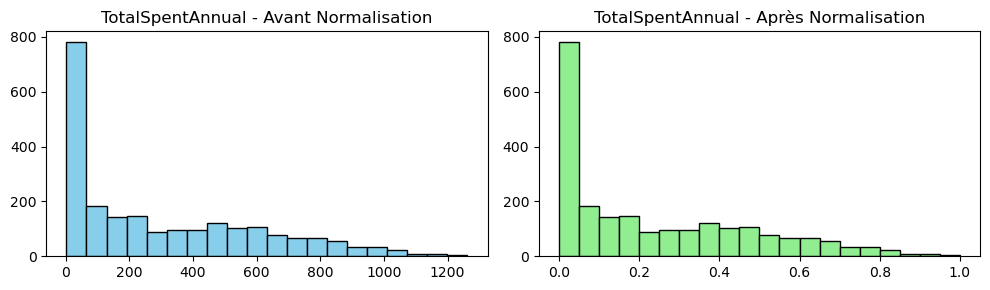

In [659]:
from sklearn.preprocessing import MinMaxScaler

# Séparer les features et la colonne cible ('class')
X = df_copie.drop('Response', axis=1)  # Toutes les colonnes sauf 'class'
y = df_copie['Response']  # La colonne cible

# Initialiser le MinMaxScaler pour la normalisation
scaler = MinMaxScaler()

# Normaliser les données (features) et les remplacer dans df_encoded
df_copie[X.columns] = scaler.fit_transform(X)

# Ajouter de nouveau la colonne cible 'class' dans df_copie(si elle a été modifiée par la séparation)
df_copie['Response'] = y

# Afficher les histogrammes des données avant et après la normalisation
for col in X.columns:
    plt.figure(figsize=(10, 3))
    
    # Avant normalisation (avant modification dans df_copie)
    plt.subplot(1, 2, 1)
    plt.hist(X[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col} - Avant Normalisation')
    plt.grid(False)
    
    # Après normalisation (après modification dans df_copie)
    plt.subplot(1, 2, 2)
    plt.hist(df_copie[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'{col} - Après Normalisation')
    plt.grid(False)
    
    plt.tight_layout()
    plt.show()


In [660]:
# Statistiques descriptives après normalisation
pd.set_option('display.width', 100)  # Set the display width to 100 characters
pd.set_option('display.precision', 1)  # Set the precision for floating-point numbers to 1 decimal place

# Afficher les statistiques descriptives pour chaque colonne normalisée
for column_name in df_copie.columns: 
        print(f"Statistiques descriptives de {column_name} après normalisation :")
        print(df_copie[column_name].describe())
        print()  # Ligne vide pour espacer

Statistiques descriptives de Year_Birth après normalisation :
count   2239.000
mean       0.720
std        0.122
min        0.000
25%        0.619
50%        0.732
75%        0.804
max        1.000
Name: Year_Birth, dtype: float64

Statistiques descriptives de Education après normalisation :
count   2239.000
mean       0.374
std        0.393
min        0.000
25%        0.000
50%        0.000
75%        0.808
max        1.000
Name: Education, dtype: float64

Statistiques descriptives de Marital_Status après normalisation :
count   2239.000
mean       0.214
std        0.153
min        0.000
25%        0.143
50%        0.286
75%        0.286
max        1.000
Name: Marital_Status, dtype: float64

Statistiques descriptives de Income après normalisation :
count   2239.000
mean       0.252
std        0.068
min        0.000
25%        0.206
50%        0.258
75%        0.303
max        1.000
Name: Income, dtype: float64

Statistiques descriptives de Kidhome après normalisation :
count   2239.00

In [661]:
pd.set_option('display.float_format', '{:.3f}'.format)
# Calculer la corrélation entre les colonnes numériques
correlations = df_copie.corr(method='pearson')

print(correlations)

                          Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
Year_Birth                     1.000     -0.022          -0.144  -0.211    0.230    -0.353   
Education                     -0.022      1.000           0.012  -0.060    0.015    -0.012   
Marital_Status                -0.144      0.012           1.000   0.037   -0.051     0.096   
Income                        -0.211     -0.060           0.037   1.000   -0.479     0.077   
Kidhome                        0.230      0.015          -0.051  -0.479    1.000    -0.036   
Teenhome                      -0.353     -0.012           0.096   0.077   -0.036     1.000   
Recency                       -0.023     -0.031          -0.022   0.003    0.008     0.017   
MntWines                      -0.235     -0.040           0.044   0.774   -0.570     0.126   
MntFruits                     -0.026     -0.075          -0.007   0.502   -0.438    -0.196   
MntMeatProducts               -0.107     -0.093           0.

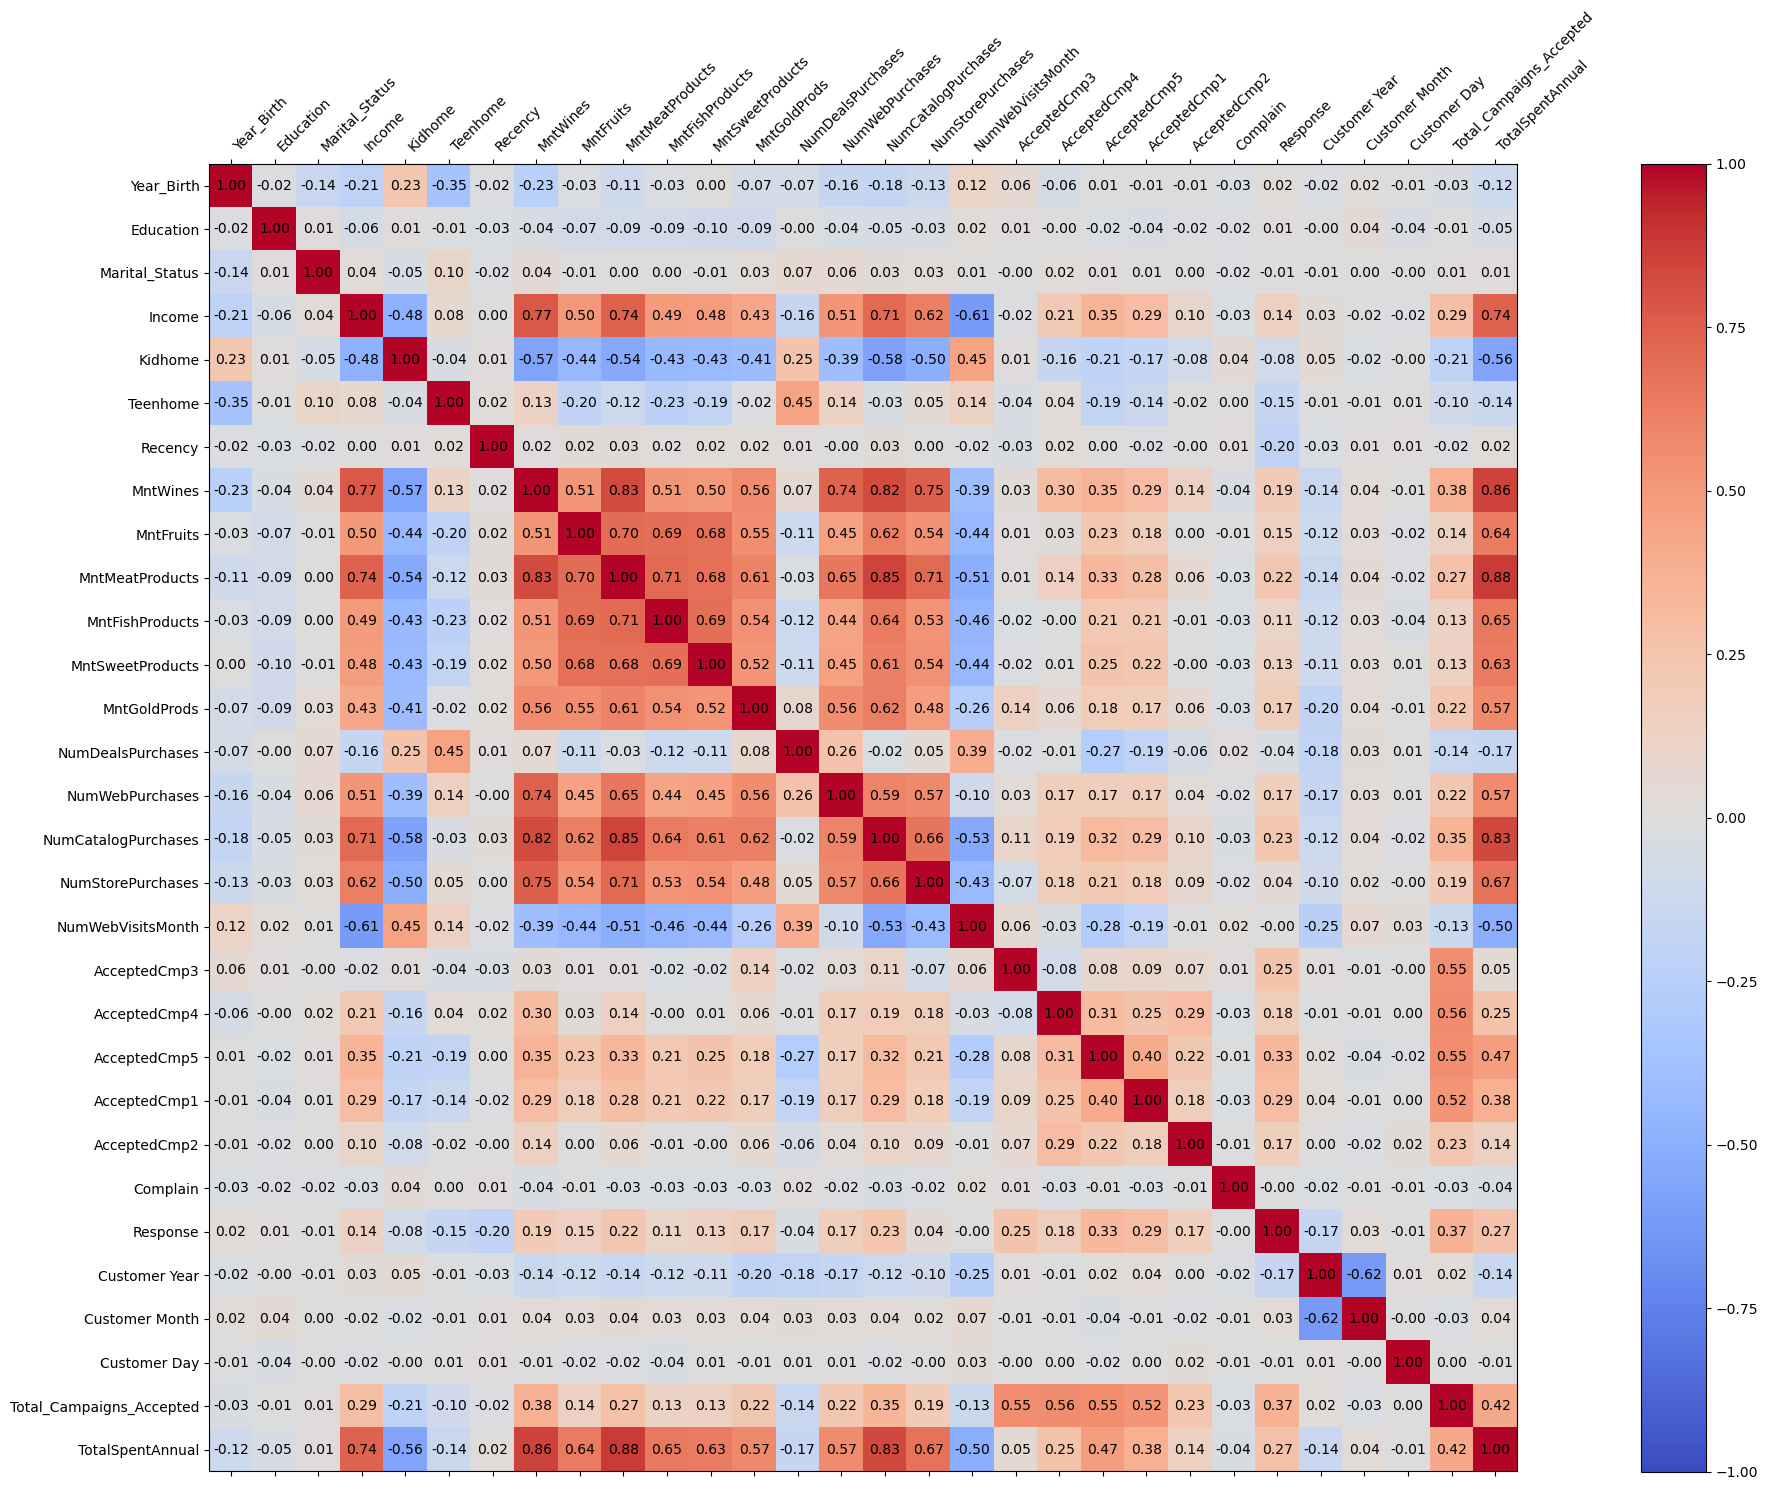

In [662]:
# Calculer la matrice de corrélation
correlations = df_copie.corr() 

# Tracer la matrice de corrélation
fig, ax = plt.subplots(figsize=(25, 15)) 
cax = ax.matshow(correlations, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
plt.grid(False)  # Désactiver les grilles

# Set ticks and labels
ticks = np.arange(len(df_copie.columns)) 
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_copie.columns, rotation=45, ha="left")
ax.set_yticklabels(df_copie.columns)

# Ajouter les valeurs de corrélation sur le plot
for i in range(len(df_copie.columns)):
    for j in range(len(df_copie.columns)):
        ax.text(j, i, f'{correlations.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Afficher le plot
plt.tight_layout()
plt.show()

# Analyse

*Corrélations fortes (positives ou négatives) :*

**Income (revenu)** a une forte corrélation positive avec :

**MntWines (dépenses en vin) : 0.774
MntMeatProducts (dépenses en viande) : 0.742
NumCatalogPurchases (achats par catalogue) : 0.711
NumStorePurchases (achats en magasin) : 0.619
TotalSpentAnnual (dépenses annuelles totales) : 0.737
Cela suggère qu'un revenu plus élevé est associé à une augmentation des dépenses dans ces catégories.**

**MntWines (dépenses en vin) et MntMeatProducts (dépenses en viande) ont également une forte corrélation positive avec 0.827, ce qui indique que les personnes qui dépensent beaucoup pour l'un de ces produits tendent également à dépenser beaucoup pour l'autre.**

**AcceptedCmp1 (acceptation de la campagne 1), AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, et AcceptedCmp5 montrent une certaine corrélation avec le Total_Campaigns_Accepted (total des campagnes acceptées). Par exemple, la corrélation de AcceptedCmp1 avec Total_Campaigns_Accepted est de 0.519, indiquant qu'une personne qui accepte une campagne est plus susceptible d'accepter plusieurs campagnes.**

**Age a une corrélation modérée avec certaines variables :**

**Income : 0.211 (ce qui suggère qu'un âge plus élevé pourrait être associé à un revenu plus élevé, bien que l'effet soit modéré)
MntWines : 0.235 (légère tendance des personnes plus âgées à dépenser plus pour le vin)**

*Corrélations faibles :*
**Recency (nombre de jours depuis le dernier achat) est faiblement corrélé avec la plupart des autres variables, ce qui pourrait suggérer qu'il n'y a pas de relation forte avec les habitudes d'achat ou l'engagement des clients.**

**Education, Marital_Status, et Customer Year (année du client) montrent des corrélations faibles avec la majorité des autres variables. Cela pourrait suggérer que ces facteurs démographiques ont moins d'impact direct sur les comportements d'achat ou l'engagement des campagnes marketing.**

**Complain ( si le client s'est plaint au cours des 2 dernières années) montre une faible corrélation avec d'autres variables, ce qui pourrait suggérer que les clients qui font une réclamation ne montrent pas de comportements d'achat spécifiques ou significatifs par rapport à ceux qui ne font pas de réclamation.**

*Variables liées aux achats (par catalogue, magasin, etc.) :*
**Les variables NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, et NumStorePurchases montrent toutes une forte corrélation entre elles. Cela suggère qu'un client qui effectue des achats dans un canal (catalogue, magasin, en ligne) a tendance à faire des achats dans d'autres canaux également.**

*Réponse aux campagnes :*
**Les AcceptedCmp (acceptations de campagnes) montrent des corrélations modérées entre elles. Cela signifie que les clients qui acceptent une campagne sont susceptibles de répondre favorablement à d'autres campagnes aussi.
Total_Campaigns_Accepted est fortement corrélé avec TotalSpentAnnual (0.419), ce qui peut indiquer que plus un client accepte de campagnes, plus il a tendance à dépenser annuellement. Les variables AcceptedCmp1 à AcceptedCmp5 et Total_Campaigns_Accepted montrent des liens avec les dépenses annuelles, ce qui peut aider à identifier les segments les plus réactifs et potentiellement les plus profitables.**


D'après la matrice de corrélation, la colonne "âge" est fortement correlée avec la colonne "Year_Birth"; il s'agirait  donc de supprimer l'un

In [663]:
# Calcul des quartiles pour chaque colonne numérique
quartiles = df_copie.quantile([0.25, 0.5, 0.75])

# Calcul des IQR pour chaque colonne
IQR = quartiles.loc[0.75] - quartiles.loc[0.25]
# Calcul des whiskers (limites inférieure et supérieure) pour chaque colonne
# Et création d'un DataFrame pour une meilleure visualisation
whiskers = pd.DataFrame({'Lower Whisker': quartiles.loc[0.25] - 1.5 * IQR,
                         'Upper Whisker': quartiles.loc[0.75] + 1.5 * IQR})

# Afficher les résultats
print("Quartiles (Q1, Q2, Q3) pour chaque colonne :")
print(quartiles)

print("\nIQR pour chaque colonne :")
print(IQR)

print("\nLimites des whiskers (inférieure et supérieure) pour chaque colonne :")
print(whiskers)

Quartiles (Q1, Q2, Q3) pour chaque colonne :
       Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
0.250       0.619      0.000           0.143   0.206    0.000     0.000    0.242     0.281   
0.500       0.732      0.000           0.286   0.258    0.000     0.000    0.495     0.555   
0.750       0.804      0.808           0.286   0.303    0.500     0.500    0.747     0.752   

       MntFruits  MntMeatProducts  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0.250      0.141            0.354  ...         0.000         0.000         0.000     0.000   
0.500      0.435            0.538  ...         0.000         0.000         0.000     0.000   
0.750      0.684            0.709  ...         0.000         0.000         0.000     0.000   

       Response  Customer Year  Customer Month  Customer Day  Total_Campaigns_Accepted  \
0.250     0.000          0.500           0.182         0.233                     0.000   
0.500     0.000      

**Observations:**
Pour la colonne Income, Q1 est 0.206, Q2 (médiane) est 0.258 et Q3 est 0.303. Cela montre que la majorité des valeurs de cette variable se situent autour de 0.258, mais une minorité des valeurs se situent au-delà de 0.303.

Pour Kidhome, les valeurs sont plus dispersées, avec Q1 et Q3 étant respectivement 0 et 0.5, ce qui suggère une répartition plus équitable entre les clients avec un nombre faible (0) ou élevé (1) d'enfants.

Income a un IQR de 0.097, ce qui indique une faible dispersion des données autour de la médiane.

Education a un IQR de 0.808, ce qui montre que les données sont plus dispersées dans cette colonne. Cela pourrait refléter une large variation dans les niveaux d'éducation des clients.


Au niveau des Whisker(les limites):
Pour Income, la limite inférieure est 0.061 et la limite supérieure est 0.449. Si des valeurs inférieures à 0.061 ou supérieures à 0.449 apparaissent, elles seront considérées comme des outliers.

La colonne AcceptedCmp1 a des whiskers allant de 0 à 0. Cela indique que toutes les valeurs se situent dans cette plage, et il n'y a pas de valeurs aberrantes dans cette variable.

Year_Birth : Les valeurs sont concentrées autour de la période autour de 0.619 à 0.804, ce qui pourrait représenter une plage d'années de naissance des clients. Les whiskers indiquent que les années de naissance varient entre 0.34 et 1.08.

Recency : Le fait que l'IQR soit élevé (0.505) et les whiskers couvrent une plage large (entre -0.515 et 1.505) suggère que la donnée de récence varie largement parmi les clients.

TotalSpentAnnual : L'IQR de 0.388 est relativement élevé, ce qui pourrait suggérer une large variation dans les dépenses annuelles des clients. Les whiskers vont de -0.556 à 0.995, indiquant une large gamme de dépenses.

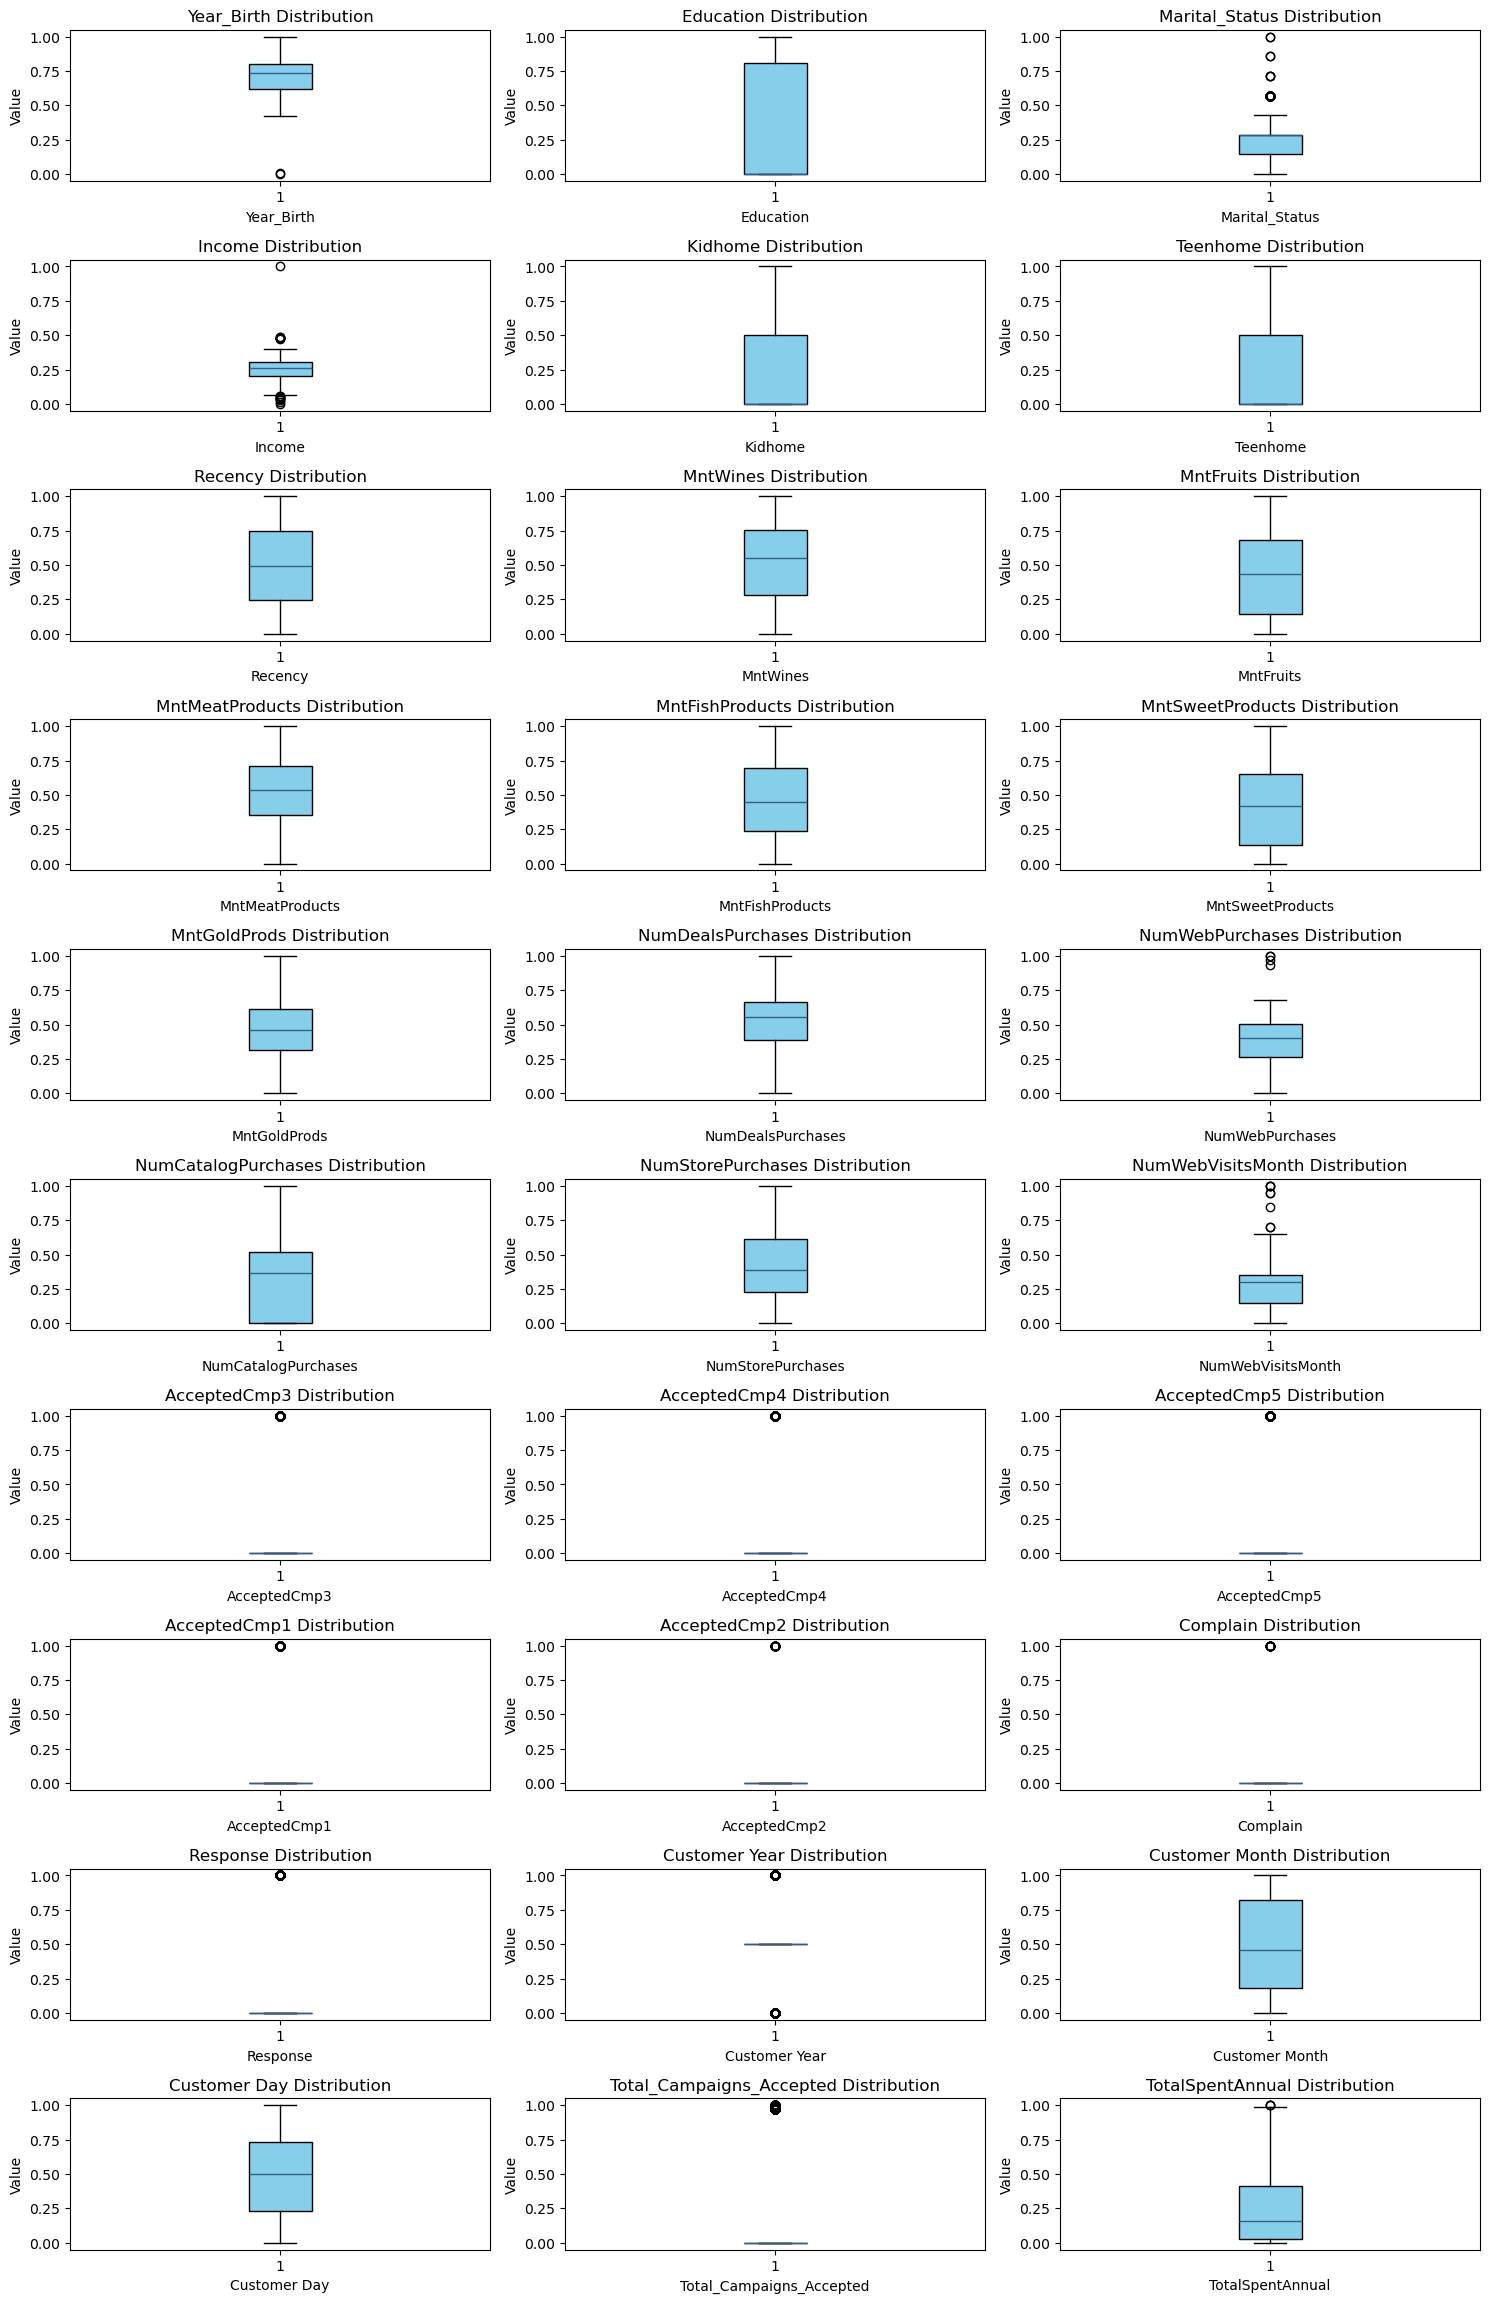

In [664]:
# Créer les box plots pour chaque colonne numérique
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15,25))  
axes = axes.flatten()

# Tracer les box plots pour chaque colonne numérique
for i, col in enumerate(df_copie.columns):
    ax = axes[i]
    ax.boxplot(df_copie[col].dropna(), patch_artist=True, boxprops=dict(facecolor='skyblue'))
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Value')
    ax.grid(False)  # Désactiver les grilles

# Supprimer les axes vides si le nombre de sous-graphiques est inférieur à (n_rows x 6)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


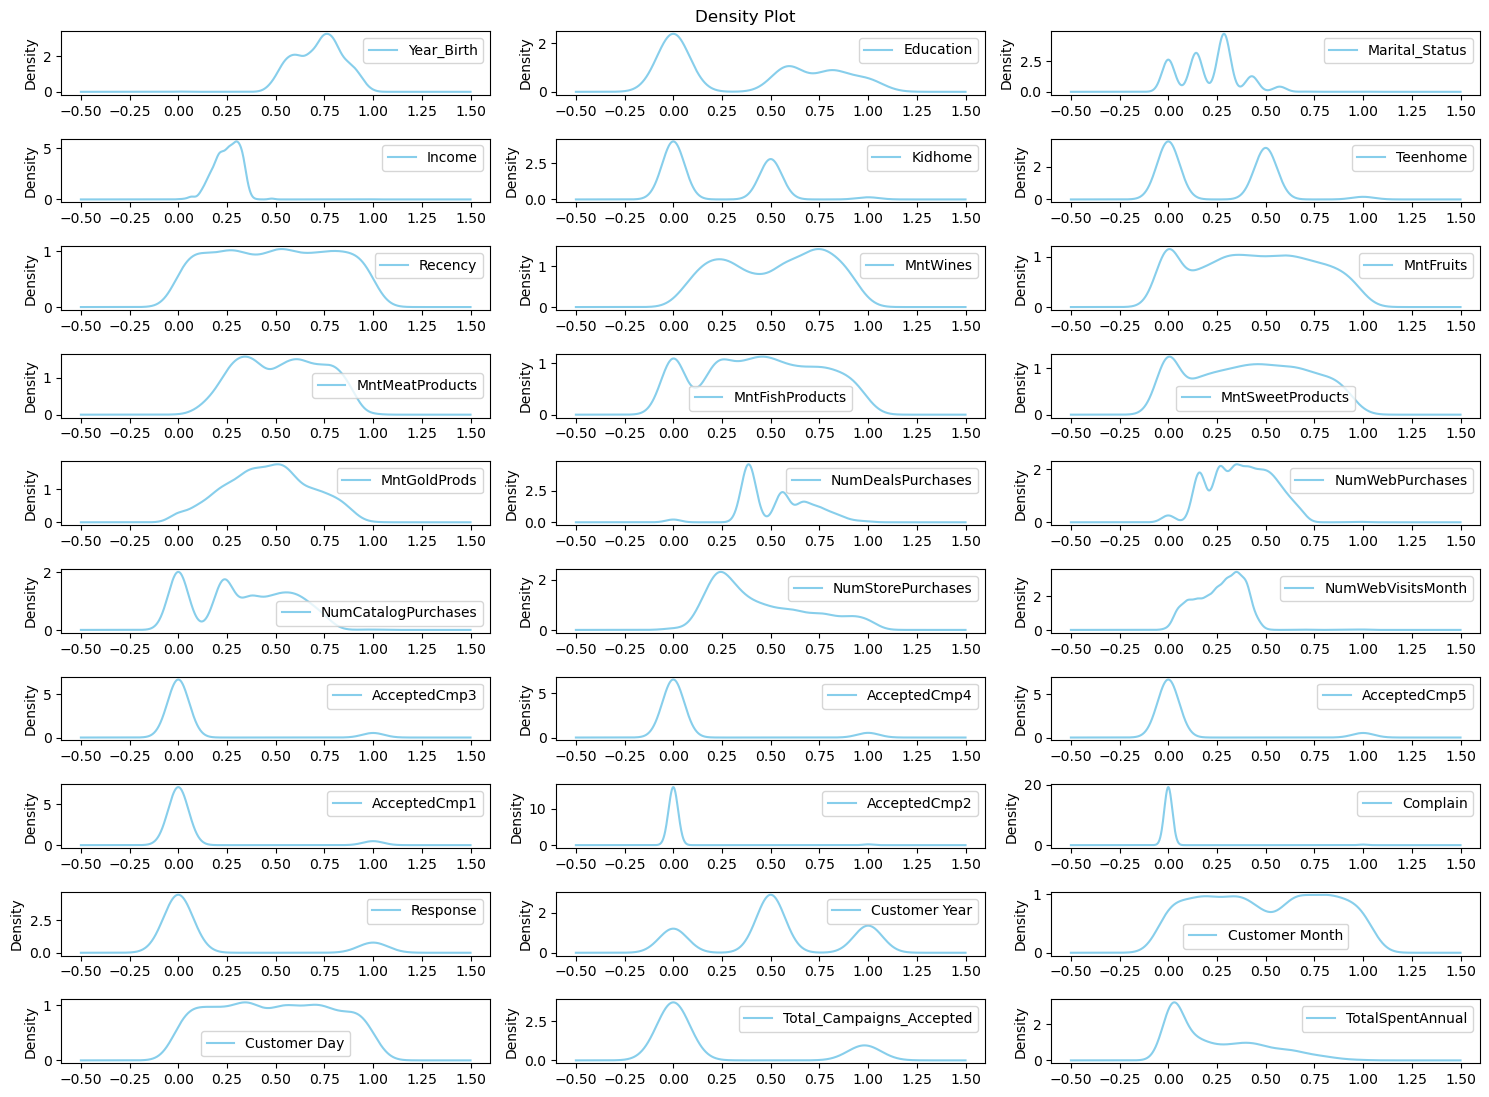

In [665]:

# Plot density plots for each variable
df_copie.plot(kind='density', subplots=True, layout=(11, 3), sharex=False, sharey=False, figsize=(15, 12), color='skyblue', title='Density Plot')

# Adjust spacing between subplots for clarity
plt.tight_layout()
plt.show()


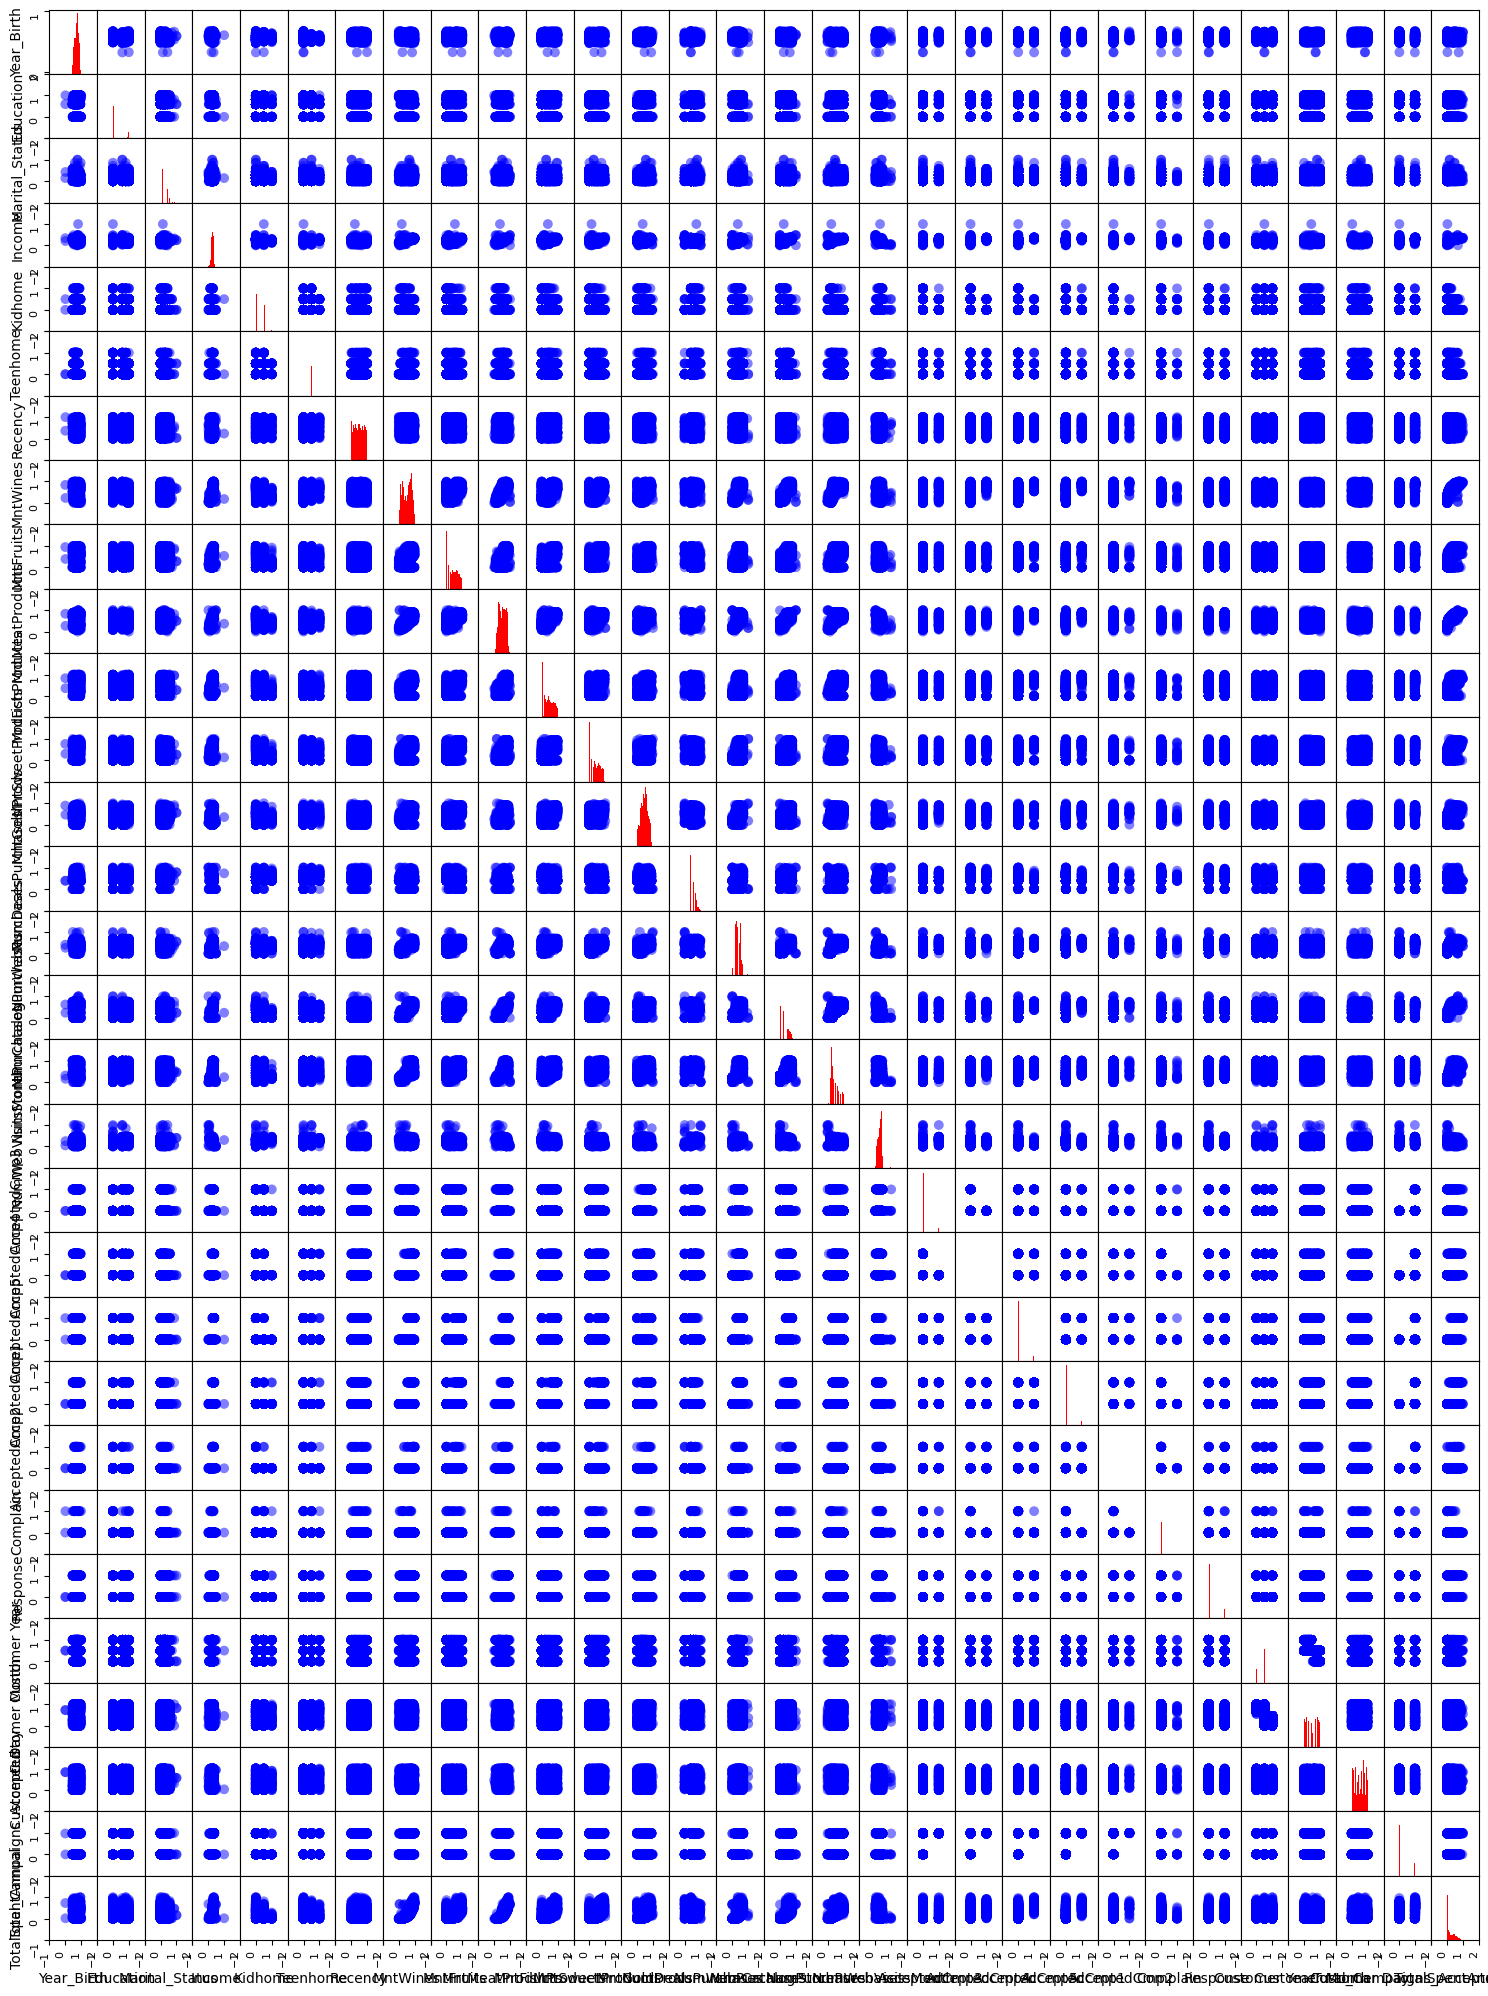

In [666]:
from pandas.plotting import scatter_matrix
# Créer la matrice de dispersion sans KDE sur la diagonale
scatter_matrix(df_copie, figsize=( 15, 20), diagonal='hist', color='blue', marker='o', alpha=0.5, s=50,hist_kwds={'color': 'red', 
                                                                                                        'bins': 20, 'density': True}, grid=True)
plt.tight_layout()

# Ajuster les espacements pour qu'il n'y ait pas d'espace entre les sous-graphes
plt.subplots_adjust(hspace=0, wspace=0)

# Ajouter la rotation des étiquettes des axes
for ax in plt.gcf().get_axes():
    # Définit explicitement les positions des ticks
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())

for ax in plt.gcf().get_axes():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') 
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90, va='top')    

# Afficher le graphique
plt.show()


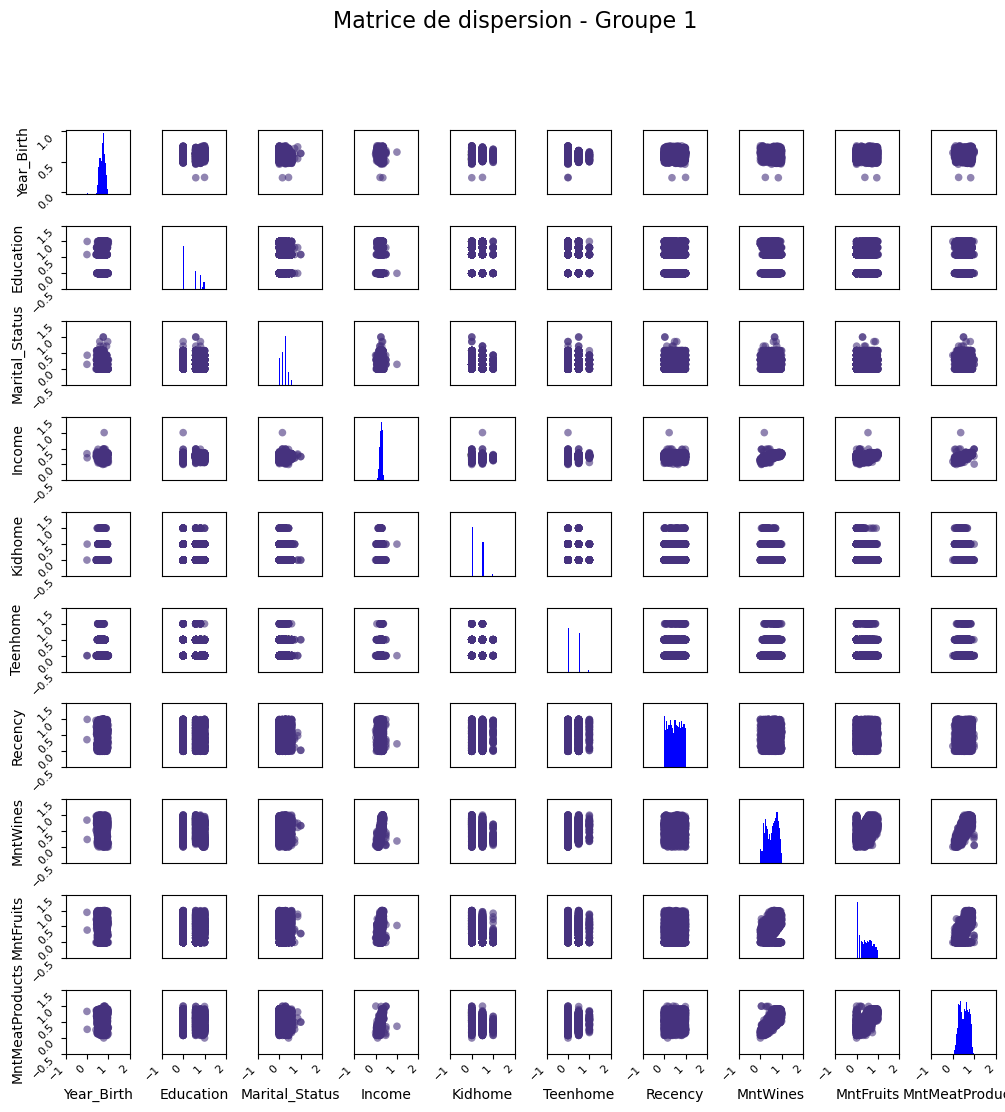

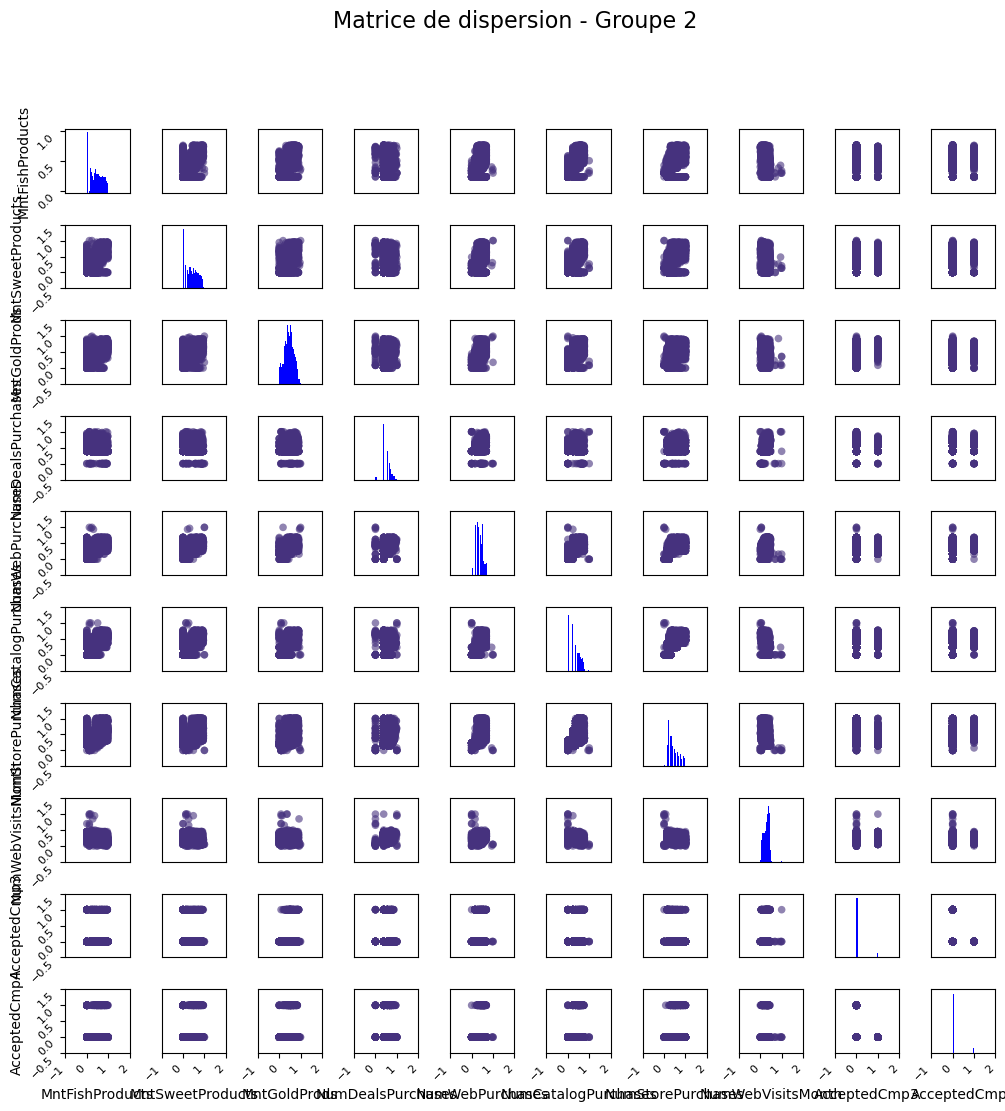

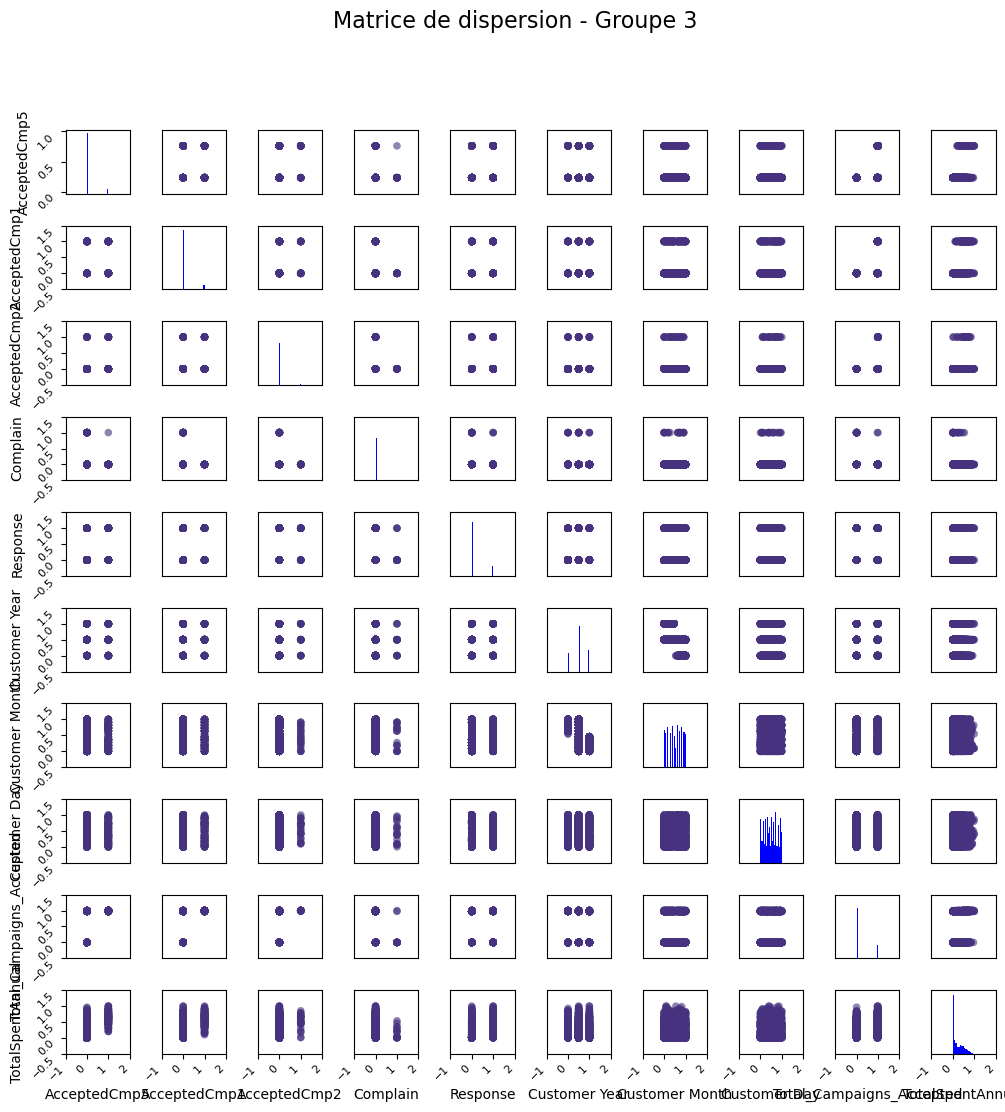

In [667]:
# Diviser les colonnes en groupes
column_groups = [df_copie.columns[:10], df_copie.columns[10:20], df_copie.columns[20:]]  # Ajustez selon le nombre de colonnes

# Créer une matrice pour chaque groupe
for i, group in enumerate(column_groups):
    scatter_matrix(df_copie[group], figsize=(12, 12), diagonal='hist', marker='o', alpha=0.6, s=30,
                   hist_kwds={'bins': 20, 'color': 'blue', 'density': True}, grid=False)
    # Rotation des étiquettes pour chaque subplot
    for ax in plt.gcf().get_axes():
        ax.set_xticks(ax.get_xticks())  # Assure que les ticks sont bien définis
        ax.set_yticks(ax.get_yticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotation horizontale
        ax.set_yticklabels(ax.get_yticklabels(), rotation=45, va='top')  # Rotation verticale

    plt.suptitle(f'Matrice de dispersion - Groupe {i + 1}', fontsize=16)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()


# Algorithm Evaluation Methods

 # *Logistic Regression*

In [668]:
print(df_copie['Response'].dtype)
df_copie['Response'] = df_copie['Response'].astype(int)
print(df_copie['Response'].dtype)

int64
int32


Sur les 30 colonnes du data, nous allons appliquer la méthode du fitrage de Chi-Square Test afin qu'elle supprime les redondances, qu'elle prenne en compte la relation la relation fonctionnalité-cible, prenne en compte les données normalisées. En ce sens, le filtrage dépend de la cible, on appliquera donc le filtrage après la méthode de spliting qui est le k_fold en raison de la dimension du data.

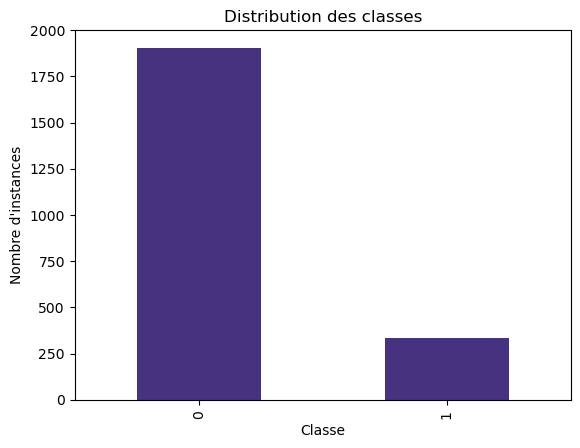

In [669]:
import matplotlib.pyplot as plt
df_copie['Response'].value_counts().plot(kind='bar')
plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'instances')
plt.show()


In [670]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Fonction de séparation en k-folds
def cross_validation_split(X, y, folds=6):
    # Utiliser StratifiedKFold pour s'assurer que chaque fold a une proportion similaire de classes
    skf = StratifiedKFold(n_splits=folds)
    return skf.split(X, y)

# Fonction de filtrage des colonnes avec le test du chi carré
def chi_square_feature_selection(X, y, k=10):
    # Sélectionner les meilleures features en utilisant le test du chi carré
    chi2_selector = SelectKBest(chi2, k=k)
    X_new = chi2_selector.fit_transform(X, y)
    return X_new, chi2_selector

# Fonction d'entraînement avec la régression logistique et évaluation
def evaluate_logistic_regression(X, y, folds=6, k_best=3):
    # Diviser les données avec la validation croisée
    folds_data = cross_validation_split(X, y, folds)
    
    scores = []
    for train_index, test_index in folds_data:
        # Séparer les données d'entraînement et de test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Sélectionner les meilleures caractéristiques en utilisant le chi carré
        X_train_selected, chi2_selector = chi_square_feature_selection(X_train, y_train, k_best)
        X_test_selected = chi2_selector.transform(X_test)  # Appliquer la même sélection sur le test
        
        # Entraîner le modèle de régression logistique
        model = LogisticRegression(max_iter=1000) 
        model.fit(X_train_selected, y_train)
        
        # Prédictions
        y_pred = model.predict(X_test_selected)

        print(f"Type de y_test: {type(y_test)}")
        print(f"Type de y_pred: {type(y_pred)}")
        print(f"Valeurs uniques de y_test: {np.unique(y_test)}")
        print(f"Valeurs uniques de y_pred: {np.unique(y_pred)}")

        # Calcul de la précision
        precision = precision_score(y_test, y_pred,average='binary')
        scores.append(precision)

    return scores

X = df_copie.drop(columns=['Response']).values  # Features
y = df_copie['Response'].values  # Target

selected_features = chi2_selector.get_support(indices=True)
print(f"Indices des caractéristiques sélectionnées : {selected_features}")
print(f"Caractéristiques sélectionnées : {df_copie.columns[selected_features]}")

# Nombre de folds pour la validation croisée
folds =6

# Nombre de meilleures caractéristiques à sélectionner avec le chi carré
k_best =3

# Évaluer le modèle
scores = evaluate_logistic_regression(X, y, folds=folds, k_best=k_best)
print(f"Précisions par fold: {scores}")
print(f"Précision moyenne: {np.mean(scores):.2f}")


Indices des caractéristiques sélectionnées : [20 21 27]
Caractéristiques sélectionnées : Index(['AcceptedCmp5', 'AcceptedCmp1', 'Customer Day'], dtype='object')
Type de y_test: <class 'numpy.ndarray'>
Type de y_pred: <class 'numpy.ndarray'>
Valeurs uniques de y_test: [0 1]
Valeurs uniques de y_pred: [0 1]
Type de y_test: <class 'numpy.ndarray'>
Type de y_pred: <class 'numpy.ndarray'>
Valeurs uniques de y_test: [0 1]
Valeurs uniques de y_pred: [0 1]
Type de y_test: <class 'numpy.ndarray'>
Type de y_pred: <class 'numpy.ndarray'>
Valeurs uniques de y_test: [0 1]
Valeurs uniques de y_pred: [0 1]
Type de y_test: <class 'numpy.ndarray'>
Type de y_pred: <class 'numpy.ndarray'>
Valeurs uniques de y_test: [0 1]
Valeurs uniques de y_pred: [0 1]
Type de y_test: <class 'numpy.ndarray'>
Type de y_pred: <class 'numpy.ndarray'>
Valeurs uniques de y_test: [0 1]
Valeurs uniques de y_pred: [0 1]
Type de y_test: <class 'numpy.ndarray'>
Type de y_pred: <class 'numpy.ndarray'>
Valeurs uniques de y_test: [0

Varier le nombre de folds, seul, fais varier la précision(augmentation ou diminution); Mais la meilleure précision est obtenue pour k= 6. Une fois le nombre de folds fixé , on fait varier k_best( détermine combien de caractéristiques sont retenues après la sélection de caractéristiques basée sur le test du chi carré): plus on le diminue, plus la précision augmente, ce qui simplifie le modèle. Pour k_best = 3, on obtient une précison de 79%.

In [671]:
# Calculer les métriques TP, FP, FN, TN
def calculate_confusion_matrix_metrics(actual, predicted):
    # Initialiser les comptes pour chaque catégorie
    tp = fp = fn = tn = 0

    # Itérer à travers les valeurs réelles et prédites
    for a, p in zip(actual, predicted):
        if a == 1 and p == 1:
            tp += 1  # True Positive: Modèle prédit correctement positif
        elif a == 0 and p == 1:
            fp += 1  # False Positive: Modèle prédit positif, mais c'est en réalité négatif
        elif a == 1 and p == 0:
            fn += 1  # False Negative: Modèle prédit négatif, mais c'est en réalité positif
        elif a == 0 and p == 0:
            tn += 1  # True Negative: Modèle prédit correctement négatif
    
    return tp, fp, fn, tn

# Calcul des métriques
tp, fp, fn, tn = calculate_confusion_matrix_metrics(y_test, y_pred)

# Affichage des métriques
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Negatives (TN):", tn)

# Créer la matrice de confusion avec sklearn
cm = confusion_matrix(y_test, y_pred)

# Convertir la matrice en DataFrame pour un affichage sous forme de tableau
df_copie_cm = pd.DataFrame(cm, index=['Prédit Négatif', 'Prédit Positif'],
                  columns=['Actual Négatif', 'Actual Positif'])

# Afficher la matrice de confusion
print("\nMatrice de Confusion sous forme de tableau :")
print(df_copie_cm)

True Positives (TP): 24
False Positives (FP): 6
False Negatives (FN): 42
True Negatives (TN): 375

Matrice de Confusion sous forme de tableau :
                Actual Négatif  Actual Positif
Prédit Négatif             375               6
Prédit Positif              42              24


In [672]:
# Calcul des métriques
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0  # Sensibilité
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

# Affichage des résultats
print("Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensibilité): {recall:.3f}")
print(f"Specificity: {specificity:.3f}")

Metrics:
Accuracy: 0.893
Precision: 0.800
Recall (Sensibilité): 0.364
Specificity: 0.984


**Recall:** Seulement 36% des cas positifs ont été correctement détectés. Cela montre que le modèle a du mal à identifier les vrais positifs.

**Specificity**: Le modèle est excellent pour reconnaître les vrais négatifs (98.4% de précision sur la classe négative).

**Precision**: Parmi les prédictions positives, 80% sont correctes. Le modèle est donc fiable lorsqu'il prédit un positif.

**Accuracy**: Le modèle a une exactitude globale de 89%, ce qui est acceptable, mais cela masque les problèmes de déséquilibre.


# Autre approche: modèle Random Forest

In [673]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Initialiser le modèle de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Validation croisée avec StratifiedKFold
k = 5  # Nombre de folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialiser les listes pour collecter les métriques
precision_list, recall_list, specificity_list, f1_list = [], [], [], []

for train_index, test_index in skf.split(X, y):
    # Diviser les données en train/test pour ce fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Entraîner le modèle sur les données d'entraînement
    rf_model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = rf_model.predict(X_test)
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    # Calcul des métriques pour ce fold
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    # Stocker les métriques
    precision_list.append(precision)
    recall_list.append(recall)
    specificity_list.append(specificity)
    f1_list.append(f1_score)

# Moyennes des métriques sur tous les folds
print(f"Précision moyenne : {np.mean(precision_list):.2f}")
print(f"Rappel moyen : {np.mean(recall_list):.2f}")
print(f"Spécificité moyenne : {np.mean(specificity_list):.2f}")
print(f"F1-score moyen : {np.mean(f1_list):.2f}")


Précision moyenne : 0.76
Rappel moyen : 0.39
Spécificité moyenne : 0.98
F1-score moyen : 0.51


Precision :

Le modèle dans les premiers résultats (avec précision de 0.76) est meilleur en termes de précision, ce qui signifie qu'il fait moins d'erreurs sur ses prédictions positives. Cependant, ce modèle montre un faible rappel (0.39), ce qui suggère qu'il a du mal à identifier les cas positifs réels.
Le modèle dans les derniers résultats (avec précision de 0.76) a une précision légèrement inférieure, mais son rappel (0.39) est plus élevé, ce qui signifie qu'il est mieux à identifier les vrais positifs, même s'il fait encore des erreurs dans ses prédictions positives.

Specificity :

La spécificité est très élevée dans les deux modèles. Cela indique que les deux modèles sont bons pour prédire les cas négatifs.

l'objectif étant d'identifier davantage de vrais positifs tout en maintenant un équilibre entre la précision et le rappel, le modèle avec un rappel plus élevé (0.39) serait mieux adapté, meme si la précision baisse pour ce deuxième modèle.

# Autre approche: Decision Tree

In [674]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import numpy as np
import pandas as pd

# Fonction de séparation en k-folds
def cross_validation_split(X, y, folds=9):
    skf = StratifiedKFold(n_splits=folds)
    return skf.split(X, y)

# Fonction de sélection des caractéristiques avec le test du chi carré
def chi_square_feature_selection(X, y, k=10):
    chi2_selector = SelectKBest(chi2, k=k)
    X_new = chi2_selector.fit_transform(X, y)
    return X_new, chi2_selector

# Fonction d'entraînement et évaluation du modèle avec Decision Tree
def evaluate_decision_tree(X, y, folds=3, k_best=13):
    folds_data = cross_validation_split(X, y, folds)
    
    scores_precision = []
    scores_recall = []
    scores_sensitivity = []
    
    for train_index, test_index in folds_data:
        # Séparer les données d'entraînement et de test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Sélectionner les meilleures caractéristiques
        X_train_selected, chi2_selector = chi_square_feature_selection(X_train, y_train, k_best)
        X_test_selected = chi2_selector.transform(X_test)  # Appliquer la même sélection sur le test
        
        # Entraîner le modèle Decision Tree
        model = DecisionTreeClassifier(criterion='gini', max_depth=5)  # Paramètre 'max_depth' pour éviter le sur-apprentissage
        model.fit(X_train_selected, y_train)
        
        # Prédictions
        y_pred = model.predict(X_test_selected)
        
        # Calcul des métriques
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        
        # Sensibilité = Rappel pour les classes binaires
        sensitivity = recall  # Sensibilité et rappel sont équivalents ici
        
        scores_precision.append(precision)
        scores_recall.append(recall)
        scores_sensitivity.append(sensitivity)
    
    return np.mean(scores_precision), np.mean(scores_recall), np.mean(scores_sensitivity)

# Charger les données (vous pouvez ajuster cette ligne selon votre dataset)
X = df_copie.drop(columns=['Response']).values  # Features
y = df_copie['Response'].values  # Target

# Paramètres
folds = 9  # Nombre de folds pour la validation croisée
k_best = 6  # Nombre de meilleures caractéristiques à sélectionner

# Évaluer le modèle Decision Tree
precision, recall, sensitivity = evaluate_decision_tree(X, y, folds=folds, k_best=k_best)

# Affichage des résultats
print(f"Précision moyenne : {precision:.2f}")
print(f"Rappel moyen : {recall:.2f}")
print(f"Sensibilité moyenne : {sensitivity:.2f}")


Précision moyenne : 0.73
Rappel moyen : 0.19
Sensibilité moyenne : 0.19


Ce modèle offre une performance encore plus moindre que les précedentes, en matière de réduire les faux positifs, ce qui est le coût à éviter. 

**En bref, le modèle qui est le plus performant pour prédire le maximum de personnes acceptant les campagnes marketing est le Random Forest.**